# Keyword Prediction Multiclass Evaluation for BERT models

Copyright (C) 2021 ServiceNow, Inc.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('..')
import seaborn as sns
import matplotlib.pyplot as plt

## Load the evaluation data

This notebook relies on the `get_bert_runs.py` script which produces the following two files
* bert_eval_metrics.parquet
* bert_eval_data.csv

Ensure that the paths in the following cell point to the location of those files on your system.

In [272]:
import pandas as pd 

bert_eval_data = pd.read_parquet('../../bert_eval_metrics.parquet')

bert_run_data = pd.read_csv('../../bert_eval_data.csv')

bert_eval_data = pd.merge(bert_run_data, bert_eval_data, left_on='run_dir_full', right_on='run_dir_full')
display(bert_eval_data)

,Unnamed: 0,rundir,run_dir_full,dataset,subject,text_col,meta_pipeline,bert_model,use_class_weights,finished,...,eval_confusion_matrix,eval_runtime,eval_samples_per_second,epoch,split,nrun,run_dir,train/eval,train_runtime,train_samples_per_second
0,0,run-MULTICLASS_2021-03-02-17-51-01193094,/nrcan_p2/data/07_model_output/keyword_predict...,small,subject_5,title_merged,None_None,distilbert-base-uncased,False,True,...,"[[[1456, 160], [138, 242]], [[1663, 14], [239,...",4.4407,449.478,3.0,0,0,run-MULTICLASS_2021-03-02-17-51-01193094,eval,NaN,NaN
1,0,run-MULTICLASS_2021-03-02-17-51-01193094,/nrcan_p2/data/07_model_output/keyword_predict...,small,subject_5,title_merged,None_None,distilbert-base-uncased,False,True,...,None,NaN,NaN,3.0,0,0,run-MULTICLASS_2021-03-02-17-51-01193094,train,820.8018,0.914
2,0,run-MULTICLASS_2021-03-02-17-51-01193094,/nrcan_p2/data/07_model_output/keyword_predict...,small,subject_5,title_merged,None_None,distilbert-base-uncased,False,True,...,"[[[1548, 68], [200, 180]], [[1662, 15], [243, ...",4.4161,451.983,3.0,0,1,run-MULTICLASS_2021-03-02-17-51-01193094,eval,NaN,NaN
3,0,run-MULTICLASS_2021-03-02-17-51-01193094,/nrcan_p2/data/07_model_output/keyword_predict...,small,subject_5,title_merged,None_None,distilbert-base-uncased,False,True,...,None,NaN,NaN,3.0,0,1,run-MULTICLASS_2021-03-02-17-51-01193094,train,738.2438,1.016
4,0,run-MULTICLASS_2021-03-02-17-51-01193094,/nrcan_p2/data/07_model_output/keyword_predict...,small,subject_5,title_merged,None_None,distilbert-base-uncased,False,True,...,"[[[1490, 126], [179, 201]], [[1662, 15], [251,...",4.4095,452.660,3.0,0,2,run-MULTICLASS_2021-03-02-17-51-01193094,eval,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11249,0,run-MULTICLASS_2021-03-10-17-49-54806976,/nrcan_p2/data/07_model_output/keyword_predict...,small,subject_desc_t10,desc_en_en_50_3000,None_None,/nrcan_p2/mlflow_data/81/108721072d4840e78509f...,True,True,...,None,NaN,NaN,3.0,4,0,run-MULTICLASS_2021-03-10-17-49-54806976,train,58.1769,1.392
11250,0,run-MULTICLASS_2021-03-10-17-49-54806976,/nrcan_p2/data/07_model_output/keyword_predict...,small,subject_desc_t10,desc_en_en_50_3000,None_None,/nrcan_p2/mlflow_data/81/108721072d4840e78509f...,True,True,...,"[[[112, 86], [2, 10]], [[87, 106], [4, 13]], [...",0.4994,420.512,3.0,4,1,run-MULTICLASS_2021-03-10-17-49-54806976,eval,NaN,NaN
11251,0,run-MULTICLASS_2021-03-10-17-49-54806976,/nrcan_p2/data/07_model_output/keyword_predict...,small,subject_desc_t10,desc_en_en_50_3000,None_None,/nrcan_p2/mlflow_data/81/108721072d4840e78509f...,True,True,...,None,NaN,NaN,3.0,4,1,run-MULTICLASS_2021-03-10-17-49-54806976,train,58.9487,1.374
11252,0,run-MULTICLASS_2021-03-10-17-49-54806976,/nrcan_p2/data/07_model_output/keyword_predict...,small,subject_desc_t10,desc_en_en_50_3000,None_None,/nrcan_p2/mlflow_data/81/108721072d4840e78509f...,True,True,...,"[[[83, 115], [5, 7]], [[87, 106], [3, 14]], [[...",0.4963,423.152,3.0,4,2,run-MULTICLASS_2021-03-10-17-49-54806976,eval,NaN,NaN


In [273]:
bert_eval_data.meta_pipeline.unique()

array(['None_None', 'SIMPLE_PIPELINE_BERT_3_None',
       'PIPELINE_BERT_80_None'], dtype=object)

In [274]:
# filter the unwanted runs
bert_eval_data = bert_eval_data[
    (bert_eval_data.dataset == "small") &
    (bert_eval_data.text_col != 'desc_en_en') &
    #(bert_eval_data.subject.isin(["subject_5", "subject_desc_t10"])) &
    #(bert_eval_data.text_col.isin(["title_merged", "desc_en_en_50_3000"])) &
    #(bert_eval_data.meta_pipeline == "None_None") &
    #(bert_eval_data.use_class_weights == False) &
    #(bert_eval_data.epoch == 4)
    (bert_eval_data.finished == True)
]

In [275]:
bert_eval_data.columns

Index(['Unnamed: 0', 'rundir', 'run_dir_full', 'dataset', 'subject',
       'text_col', 'meta_pipeline', 'bert_model', 'use_class_weights',
       'finished', 'nodrop', 'eval_loss', 'eval_accuracy',
       'eval_micro-precision', 'eval_micro-recall', 'eval_micro-fb1',
       'eval_macro-precision', 'eval_macro-recall', 'eval_macro-fb1',
       'eval_support', 'eval_sample-precision', 'eval_sample-recall',
       'eval_sample-fb1', 'eval_confusion_matrix', 'eval_runtime',
       'eval_samples_per_second', 'epoch', 'split', 'nrun', 'run_dir',
       'train/eval', 'train_runtime', 'train_samples_per_second'],
      dtype='object')

In [276]:
bert_eval_data['model_shortform'] = bert_eval_data.bert_model.apply(
    lambda x: 'pretrained' if 'distilbert' in x
    else 'v1_a' if '/mlflow_data/42/83d34150748641b89a44b74a1beaf799' in x
    else 'v1_ab' if 'mlflow_data/40/902f7aba032a402a927059958a38e079' in x
    else 'v1_abd' if 'mlflow_data/49/dbc77f67097b4937adcb914e8895ba2c' in x
    else '80_a' if '/mlflow_data/51/9212f6a912664e3d9c949cc35db9d60b' in x
    else '80_ab' if '/mlflow_data/52/16b01e423ebe4f08a0111809eef7830e' in x
    else '80_abd' if '/mlflow_data/53/f6d9eefc176241e0b63654c63e97f901' in x
    else '90_ab' if '/mlflow_data/55/97683cfa22c145faa3e0d1cc64d2d22f' in x
    else '90_abd' if '/mlflow_data/54/9583ad61ff32407bb799716cfe197902' in x
    else 'plus_a' if '/mlflow_data/58/48c9caa04c6f490d84645e64f8abf99b' in x
    else 'plus_ab' if '/mlflow_data/59/e99fa92098fe4d99b990523245d7c88c' in x
    else 'plus_abd' if '/mlflow_data/60/47dd5bbf53fd41a19af10114b040f73f' in x
    
    else 'v1_a_geo250' if '/mlflow_data/111/aa511d0956044554a6003b03281caa81' in x
    else 'v1_ab_geo250' if '/mlflow_data/122/80c6425f81cf42589bde23cd0a76b25e' in x
    else 'v1_abd_geo250' if '/mlflow_data/117/cf48bd9e386c4016b91f2d4a6de105fb' in x
    else '80_a_geo250' if '/mlflow_data/115/c9ed23ca6b85429aacaa4d4430383066' in x
    else '80_ab_geo250' if '/mlflow_data/116/4bb189b9348042d09d6739d55acd70d8' in x
    else '80_abd_geo250' if '/mlflow_data/123/2a668c76d62e408f98c2e20e39ffe837' in x
    else '90_ab_geo250' if '/mlflow_data/121/ef9952d289794ba78b6b597c1871069c' in x
    else '90_abd_geo250' if '/mlflow_data/118/b09e1d46195e457d8113c13828522fdb' in x
    else 'plus_a_geo250' if '/mlflow_data/112/23646f5808e648fca301bdab453c9af0' in x
    else 'plus_ab_geo250' if '/mlflow_data/114/a31bd6a676e34f0ab168a09f077ec93f' in x
    else 'plus_abd_geo250' if '/mlflow_data/124/6a053efc28174894bb39f2a6a7e10ddf' in x
    
    else 'v1_a_geo500' if '/mlflow_data/96/9b369d7fb505460589f89f58a7d16bde' in x
    else 'v1_ab_geo500' if '/mlflow_data/109/259c962823fd4794bca074bc0ad0ea48' in x
    else 'v1_abd_geo500' if '/mlflow_data/103/fd5ab1b5d832460395215f71fc024333' in x
    
    else '80_a_geo500' if '/mlflow_data/98/c9d7feab3c3143d2b84c88de0119dca3' in x
    else '80_ab_geo500' if '/mlflow_data/102/f4bf6a9b7013428c89140d39a3bf2c59' in x
    else '80_abd_geo500' if '/mlflow_data/106/3258f9f79451477f87a639446295fba0' in x
    
    else '90_ab_geo500' if '/mlflow_data/104/dd946c63515e460a801e0631487cb1a5' in x
    else '90_abd_geo500' if '/mlflow_data/107/783b4970e8104255a8fed894b37ddc7a' in x
    else 'plus_a_geo500' if '/mlflow_data/97/328ae3b4fa2a4b3ab94940d75422992f' in x
    else 'plus_ab_geo500' if '/mlflow_data/101/6de217a53bac450fa2e63fc2420a3d73' in x
    else 'plus_abd_geo500' if '/mlflow_data/105/9ea9830e8e4c4bb3be386be4605e5a68' in x
    
    else '90_ab_geo250' if '/mlflow_data/119/58541a9131dc40248198702d06e08d34' in x
    else '90_ab_geo500' if '/mlflow_data/120/ac505d9ae17e4a648fb15224dbb0ab10' in x
    
    else 'plus_a_geo994' if '/mlflow_data/81/108721072d4840e78509f27ed2554422' in x
    else 'other'
)

In [277]:
bert_eval_data['model_pipeline'] = bert_eval_data.model_shortform.apply(
    lambda x: 'Pretrained' if 'pretrained' in x
        else 'v1' if 'v1' in x
        else '80' if '80' in x
        else '90' if '90' in x
        else 'PLUS' if 'plus' in x
        else 'other'
)

bert_eval_data['model_dataset'] = bert_eval_data.model_shortform.apply(
    lambda x: 'Pretrained' if 'pretrained' in x
        else 'A+B+D' if 'abd' in x
        else 'A+B' if 'ab' in x
        else 'A' if 'a' in x
        else 'other'
)

bert_eval_data['meta_pipeline_binary'] = bert_eval_data.meta_pipeline.apply(
    lambda x: 'None' if 'None_None' in x
        else 'Special'
)

bert_eval_data['tokenizer'] = bert_eval_data.model_shortform.apply(
    lambda x: 'geo250' if 'geo250' in x
        else 'geo500' if 'geo500' in x
        else 'geo994' if 'geo994' in x
        else 'pretrained'
)

bert_eval_data['training_epochs'] = bert_eval_data.bert_model.apply(
    lambda x: '3m' if '/mlflow_data/119/58541a9131dc40248198702d06e08d34' in x
    else '3m' if '/mlflow_data/120/ac505d9ae17e4a648fb15224dbb0ab10' in x
    else '1m'
)

bert_eval_data['meta_pipeline_clean'] = bert_eval_data.meta_pipeline.apply(
    lambda x: 'pretrained' if 'pretrained' in x
        else 'v1' if 'SIMPLE' in x
        else '80' if '80' in x
        else '90' if '90' in x
        else 'plus' if 'PLUS' in x
        else 'None' if 'None' in x
        else 'other'
)

bert_eval_data['input'] = bert_eval_data.text_col.apply(
    lambda x: 'Title' if 'title' in x
        else 'Description'
)

bert_eval_data['n_subjects'] = bert_eval_data.subject.apply(
    lambda x: '5' if '5' in x
        else '10' if '10' in x 
        else '30' if '30' in x
        else None
)

In [280]:
# remove duplicates
bert_eval_data = bert_eval_data[(bert_eval_data['train/eval'] == 'eval')]
print(bert_eval_data.shape)
duplicates = bert_eval_data.duplicated(subset=['subject', 'text_col', 'bert_model', 'nrun', 'split', 'use_class_weights', 'meta_pipeline'],keep=False)

bert_eval_data_duplicated = bert_eval_data[duplicates]
bert_eval_data = bert_eval_data.drop_duplicates(subset=['subject', 'text_col', 'bert_model', 
                                                       'nrun', 'split', 'model_dataset', 'model_pipeline',
                                                       'use_class_weights', 'meta_pipeline', 'tokenizer', 'training_epochs'], keep='first')
bert_eval_data_duplicated.shape

(4950, 42)


(60, 42)

In [271]:
bert_eval_data_duplicated

,Unnamed: 0,rundir,run_dir_full,dataset,subject,text_col,meta_pipeline,bert_model,use_class_weights,finished,...,train_samples_per_second,model_shortform,model_pipeline,model_dataset,meta_pipeline_binary,tokenizer,training_epochs,meta_pipeline_clean,input,n_subjects
7864,0,run-MULTICLASS_2021-03-09-03-20-54942595,/nrcan_p2/data/07_model_output/keyword_predict...,small,subject_5,title_merged,None_None,/nrcan_p2/mlflow_data/107/783b4970e8104255a8fe...,True,True,...,NaN,90_abd_geo500,90,A+B+D,None,geo500,1m,None,Title,5
7866,0,run-MULTICLASS_2021-03-09-03-20-54942595,/nrcan_p2/data/07_model_output/keyword_predict...,small,subject_5,title_merged,None_None,/nrcan_p2/mlflow_data/107/783b4970e8104255a8fe...,True,True,...,NaN,90_abd_geo500,90,A+B+D,None,geo500,1m,None,Title,5
7868,0,run-MULTICLASS_2021-03-09-03-20-54942595,/nrcan_p2/data/07_model_output/keyword_predict...,small,subject_5,title_merged,None_None,/nrcan_p2/mlflow_data/107/783b4970e8104255a8fe...,True,True,...,NaN,90_abd_geo500,90,A+B+D,None,geo500,1m,None,Title,5
7870,0,run-MULTICLASS_2021-03-09-03-20-54942595,/nrcan_p2/data/07_model_output/keyword_predict...,small,subject_5,title_merged,None_None,/nrcan_p2/mlflow_data/107/783b4970e8104255a8fe...,True,True,...,NaN,90_abd_geo500,90,A+B+D,None,geo500,1m,None,Title,5
7872,0,run-MULTICLASS_2021-03-09-03-20-54942595,/nrcan_p2/data/07_model_output/keyword_predict...,small,subject_5,title_merged,None_None,/nrcan_p2/mlflow_data/107/783b4970e8104255a8fe...,True,True,...,NaN,90_abd_geo500,90,A+B+D,None,geo500,1m,None,Title,5
7874,0,run-MULTICLASS_2021-03-09-03-20-54942595,/nrcan_p2/data/07_model_output/keyword_predict...,small,subject_5,title_merged,None_None,/nrcan_p2/mlflow_data/107/783b4970e8104255a8fe...,True,True,...,NaN,90_abd_geo500,90,A+B+D,None,geo500,1m,None,Title,5
7876,0,run-MULTICLASS_2021-03-09-03-20-54942595,/nrcan_p2/data/07_model_output/keyword_predict...,small,subject_5,title_merged,None_None,/nrcan_p2/mlflow_data/107/783b4970e8104255a8fe...,True,True,...,NaN,90_abd_geo500,90,A+B+D,None,geo500,1m,None,Title,5
7878,0,run-MULTICLASS_2021-03-09-03-20-54942595,/nrcan_p2/data/07_model_output/keyword_predict...,small,subject_5,title_merged,None_None,/nrcan_p2/mlflow_data/107/783b4970e8104255a8fe...,True,True,...,NaN,90_abd_geo500,90,A+B+D,None,geo500,1m,None,Title,5
7880,0,run-MULTICLASS_2021-03-09-03-20-54942595,/nrcan_p2/data/07_model_output/keyword_predict...,small,subject_5,title_merged,None_None,/nrcan_p2/mlflow_data/107/783b4970e8104255a8fe...,True,True,...,NaN,90_abd_geo500,90,A+B+D,None,geo500,1m,None,Title,5
7882,0,run-MULTICLASS_2021-03-09-03-20-54942595,/nrcan_p2/data/07_model_output/keyword_predict...,small,subject_5,title_merged,None_None,/nrcan_p2/mlflow_data/107/783b4970e8104255a8fe...,True,True,...,NaN,90_abd_geo500,90,A+B+D,None,geo500,1m,None,Title,5


### Validate that the evaluation data contains the values we expect...

In [260]:
bert_eval_data_duplicated.finished.unique()

array([ True])

In [259]:
bert_eval_data_duplicated.run_dir.unique()

array(['run-MULTICLASS_2021-03-09-03-20-54942595',
       'run-MULTICLASS_2021-03-09-03-29-23693425',
       'run-MULTICLASS_2021-03-09-20-14-51765659',
       'run-MULTICLASS_2021-03-09-20-17-08530537'], dtype=object)

In [255]:
bert_eval_data.model_shortform.unique()

array(['pretrained', 'v1_a', 'v1_ab', 'v1_abd', '80_a', '80_ab', '80_abd',
       '90_abd', '90_ab', 'plus_a_geo250', 'plus_ab_geo250',
       'plus_abd_geo250', 'plus_a', 'plus_ab', 'plus_abd', 'v1_ab_geo250',
       'v1_a_geo250', 'v1_abd_geo250', '90_ab_geo250', '80_ab_geo250',
       '80_abd_geo250', '80_ab_geo500', '90_abd_geo250', 'v1_a_geo500',
       'v1_abd_geo500', '80_a_geo500', '80_abd_geo500', '80_a_geo250',
       '90_ab_geo500', 'plus_a_geo994'], dtype=object)

In [44]:
bert_eval_data.meta_pipeline.unique()

array(['None_None', 'PIPELINE_BERT_80_None',
       'SIMPLE_PIPELINE_BERT_3_None'], dtype=object)

In [31]:
bert_eval_data.model_pipeline.unique()

array(['pretrained', 'v1', '80', '90', 'plus'], dtype=object)

In [33]:
bert_eval_data.tokenizer.unique()

array(['pretrained', 'geo250', 'geo500'], dtype=object)

### Average performance across runs...

In [281]:
bert_eval_data_avg_across_runs = bert_eval_data.groupby(['run_dir_full', 'split', 'nrun', 'train/eval', 
                                                        'dataset', 'subject', 'input', 'n_subjects',
       'text_col', 'meta_pipeline', 'bert_model', 'meta_pipeline_binary', 'meta_pipeline_clean',
        'use_class_weights', 'model_shortform', 'model_pipeline','model_dataset', 'tokenizer', 'training_epochs']).mean()

bert_eval_data_avg_across_runs[bert_eval_data_avg_across_runs['finished'] == True]
bert_eval_data_avg_across_runs

Unnamed: 0  \
run_dir_full                                       split nrun train/eval dataset subject          input       n_subjects text_col           meta_pipeline bert_model                                         meta_pipeline_binary meta_pipeline_clean use_class_weights model_shortform model_pipeline model_dataset tokenizer  training_epochs               
/nrcan_p2/data/07_model_output/keyword_predicti... 0     0    eval       small   subject_5        Title       5          title_merged       None_None     distilbert-base-uncased                            None                 None                False             pretrained      Pretrained     Pretrained    pretrained 1m                        0   
                                                         1    eval       small   subject_5        Title       5          title_merged       None_None     distilbert-base-uncased                            None                 None                False             pretrained      Pretrained     Pretrained    pretrained 1m                        0   
                                                         2    eval       small   subject_5        Title       5          title_merged       None_None     distilbert-base-uncased                            None                 None                False             pretrained      Pretrained     Pretrained    pretrained 1m                        0   
                                                   1     0    eval       small   subject_5        Title       5          title_merged       None_None     distilbert-base-uncased                            None                 None                False             pretrained      Pretrained     Pretrained    pretrained 1m                        0   
                                                         1    eval       small   subject_5        Title       5          title_merged       None_None     distilbert-base-uncased                            None                 None                False             pretrained      Pretrained     Pretrained    pretrained 1m                        0   
...                                                                                                                                                                                                                                                                                                                                                     ...   
/nrcan_p2/data/07_model_output/keyword_predicti... 3     1    eval       small   subject_desc_t10 Description 10         desc_en_en_50_3000 None_None     /nrcan_p2/mlflow_data/81/108721072d4840e78509f2... None                 None                True              plus_a_geo994   PLUS           A             geo994     1m                        0   
                                                         2    eval       small   subject_desc_t10 Description 10         desc_en_en_50_3000 None_None     /nrcan_p2/mlflow_data/81/108721072d4840e78509f2... None                 None                True              plus_a_geo994   PLUS           A             geo994     1m                        0   
                                                   4     0    eval       small   subject_desc_t10 Description 10         desc_en_en_50_3000 None_None     /nrcan_p2/mlflow_data/81/108721072d4840e78509f2... None                 None                True              plus_a_geo994   PLUS           A             geo994     1m                        0   
                                                         1    eval       small   subject_desc_t10 Description 10         desc_en_en_50_3000 None_None     /nrcan_p2/mlflow_data/81/108721072d4840e78509f2... None                 None                True              plus_a_geo994   PLUS           A             geo994     1m                        0   
                                                         2    eval       small   subject_desc_t10 Description 10         desc

### Examine the rows that have special test values for a few columns
* 3m training epochs
* not the pretrained tokenizer
* a metadata preprocessing pipeline (that is not None) 

In [282]:
x= bert_eval_data_avg_across_runs.reset_index()
x = x[(x.nrun == 0) & (x.split == 0) & (x.subject == 'subject_5') & (x.text_col == 'title_merged')]
display(x[x.meta_pipeline_binary == 'Special'].iloc[:,5:17])
display(x[x.training_epochs == '3m'].iloc[:,5:17])
display(x[x.tokenizer != 'pretrained'].iloc[:,5:19].sort_values('tokenizer'))

,subject,input,n_subjects,text_col,meta_pipeline,bert_model,meta_pipeline_binary,meta_pipeline_clean,use_class_weights,model_shortform,model_pipeline,model_dataset
180,subject_5,Title,5,title_merged,PIPELINE_BERT_80_None,/nrcan_p2/mlflow_data/51/9212f6a912664e3d9c949...,Special,80,False,80_a,80,A
195,subject_5,Title,5,title_merged,PIPELINE_BERT_80_None,/nrcan_p2/mlflow_data/51/9212f6a912664e3d9c949...,Special,80,True,80_a,80,A
210,subject_5,Title,5,title_merged,PIPELINE_BERT_80_None,/nrcan_p2/mlflow_data/52/16b01e423ebe4f08a0111...,Special,80,False,80_ab,80,A+B
225,subject_5,Title,5,title_merged,PIPELINE_BERT_80_None,/nrcan_p2/mlflow_data/53/f6d9eefc176241e0b6365...,Special,80,False,80_abd,80,A+B+D
240,subject_5,Title,5,title_merged,PIPELINE_BERT_80_None,/nrcan_p2/mlflow_data/52/16b01e423ebe4f08a0111...,Special,80,True,80_ab,80,A+B
270,subject_5,Title,5,title_merged,PIPELINE_BERT_80_None,/nrcan_p2/mlflow_data/53/f6d9eefc176241e0b6365...,Special,80,True,80_abd,80,A+B+D
1635,subject_5,Title,5,title_merged,SIMPLE_PIPELINE_BERT_3_None,/nrcan_p2/mlflow_data/42/83d34150748641b89a44b...,Special,v1,False,v1_a,v1,A
1680,subject_5,Title,5,title_merged,SIMPLE_PIPELINE_BERT_3_None,/nrcan_p2/mlflow_data/42/83d34150748641b89a44b...,Special,v1,True,v1_a,v1,A
1785,subject_5,Title,5,title_merged,SIMPLE_PIPELINE_BERT_3_None,/nrcan_p2/mlflow_data/40/902f7aba032a402a92705...,Special,v1,False,v1_ab,v1,A+B
1800,subject_5,Title,5,title_merged,SIMPLE_PIPELINE_BERT_3_None,/nrcan_p2/mlflow_data/40/902f7aba032a402a92705...,Special,v1,True,v1_ab,v1,A+B


,subject,input,n_subjects,text_col,meta_pipeline,bert_model,meta_pipeline_binary,meta_pipeline_clean,use_class_weights,model_shortform,model_pipeline,model_dataset
4650,subject_5,Title,5,title_merged,None_None,/nrcan_p2/mlflow_data/119/58541a9131dc40248198...,None,None,True,90_ab_geo250,90,A+B
4755,subject_5,Title,5,title_merged,None_None,/nrcan_p2/mlflow_data/120/ac505d9ae17e4a648fb1...,None,None,True,90_ab_geo500,90,A+B


,subject,input,n_subjects,text_col,meta_pipeline,bert_model,meta_pipeline_binary,meta_pipeline_clean,use_class_weights,model_shortform,model_pipeline,model_dataset,tokenizer,training_epochs
2520,subject_5,Title,5,title_merged,None_None,/nrcan_p2/mlflow_data/112/23646f5808e648fca301...,None,None,True,plus_a_geo250,PLUS,A,geo250,1m
2535,subject_5,Title,5,title_merged,None_None,/nrcan_p2/mlflow_data/114/a31bd6a676e34f0ab168...,None,None,True,plus_ab_geo250,PLUS,A+B,geo250,1m
2550,subject_5,Title,5,title_merged,None_None,/nrcan_p2/mlflow_data/124/6a053efc28174894bb39...,None,None,True,plus_abd_geo250,PLUS,A+B+D,geo250,1m
2880,subject_5,Title,5,title_merged,None_None,/nrcan_p2/mlflow_data/122/80c6425f81cf42589bde...,None,None,True,v1_ab_geo250,v1,A+B,geo250,1m
2895,subject_5,Title,5,title_merged,None_None,/nrcan_p2/mlflow_data/111/aa511d0956044554a600...,None,None,True,v1_a_geo250,v1,A,geo250,1m
2985,subject_5,Title,5,title_merged,None_None,/nrcan_p2/mlflow_data/117/cf48bd9e386c4016b91f...,None,None,True,v1_abd_geo250,v1,A+B+D,geo250,1m
3165,subject_5,Title,5,title_merged,None_None,/nrcan_p2/mlflow_data/121/ef9952d289794ba78b6b...,None,None,True,90_ab_geo250,90,A+B,geo250,1m
4650,subject_5,Title,5,title_merged,None_None,/nrcan_p2/mlflow_data/119/58541a9131dc40248198...,None,None,True,90_ab_geo250,90,A+B,geo250,3m
4395,subject_5,Title,5,title_merged,None_None,/nrcan_p2/mlflow_data/118/b09e1d46195e457d8113...,None,None,True,90_abd_geo250,90,A+B+D,geo250,1m
4335,subject_5,Title,5,title_merged,None_None,/nrcan_p2/mlflow_data/123/2a668c76d62e408f98c2...,None,None,True,80_abd_geo250,80,A+B+D,geo250,1m


## Compare across metadata cleaning pipeline

array(['80_a', '80_ab', '80_abd', 'v1_a', 'v1_ab', 'v1_abd'], dtype=object)

,model_pipeline,model_shortform,model_dataset,split,dataset,subject,text_col,use_class_weights,tokenizer,training_epochs,...,eval_micro-recall,eval_micro-fb1,eval_macro-precision,eval_macro-recall,eval_macro-fb1,eval_runtime,eval_samples_per_second,epoch,train_runtime,train_samples_per_second
0,80,80_a,A,0,small,subject_30,desc_en_en_50_3000,False,pretrained,1m,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.510567,413.290667,3.0,NaN,NaN
1,80,80_a,A,0,small,subject_30,desc_en_en_50_3000,False,pretrained,1m,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.505400,417.516667,3.0,NaN,NaN
2,80,80_a,A,0,small,subject_30,desc_en_en_50_3000,True,pretrained,1m,...,0.768473,0.173448,0.098271,0.644295,0.133955,0.511433,412.591333,3.0,NaN,NaN
3,80,80_a,A,0,small,subject_30,desc_en_en_50_3000,True,pretrained,1m,...,0.770115,0.174008,0.093760,0.627842,0.128994,0.514367,410.374667,3.0,NaN,NaN
4,80,80_a,A,0,small,subject_30,title_merged,False,pretrained,1m,...,0.035376,0.066368,0.146305,0.027179,0.034672,4.460767,447.459333,3.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,v1,v1_abd,A+B+D,4,small,subject_desc_t10,desc_en_en_50_3000,True,pretrained,1m,...,0.883562,0.371672,0.245737,0.859713,0.361736,0.498133,421.616333,3.0,NaN,NaN
716,v1,v1_abd,A+B+D,4,small,subject_desc_t10,title_merged,False,pretrained,1m,...,0.345006,0.463759,0.521103,0.302134,0.369179,4.429767,450.590667,3.0,NaN,NaN
717,v1,v1_abd,A+B+D,4,small,subject_desc_t10,title_merged,False,pretrained,1m,...,0.347791,0.462619,0.515420,0.304614,0.368134,4.438767,449.677333,3.0,NaN,NaN
718,v1,v1_abd,A+B+D,4,small,subject_desc_t10,title_merged,True,pretrained,1m,...,0.729142,0.501453,0.387813,0.715081,0.493261,4.453467,448.188667,3.0,NaN,NaN


array(['80_a', '80_ab', '80_abd', 'v1_a', 'v1_ab', 'v1_abd'], dtype=object)

,model_pipeline,model_shortform,model_dataset,split,dataset,subject,text_col,use_class_weights,tokenizer,training_epochs,...,eval_micro-fb1,eval_macro-precision,eval_macro-recall,eval_macro-fb1,eval_runtime,eval_samples_per_second,epoch,train_runtime,train_samples_per_second,meta_pipeline_binary_clean
0,80,80_a,A,0,small,subject_30,desc_en_en_50_3000,False,pretrained,1m,...,0.000000,0.000000,0.000000,0.000000,0.510567,413.290667,3.0,NaN,NaN,v1/80
1,80,80_a,A,0,small,subject_30,desc_en_en_50_3000,False,pretrained,1m,...,0.000000,0.000000,0.000000,0.000000,0.505400,417.516667,3.0,NaN,NaN,None
2,80,80_a,A,0,small,subject_30,desc_en_en_50_3000,True,pretrained,1m,...,0.173448,0.098271,0.644295,0.133955,0.511433,412.591333,3.0,NaN,NaN,v1/80
3,80,80_a,A,0,small,subject_30,desc_en_en_50_3000,True,pretrained,1m,...,0.174008,0.093760,0.627842,0.128994,0.514367,410.374667,3.0,NaN,NaN,None
4,80,80_a,A,0,small,subject_30,title_merged,False,pretrained,1m,...,0.066368,0.146305,0.027179,0.034672,4.460767,447.459333,3.0,NaN,NaN,v1/80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,v1,v1_abd,A+B+D,4,small,subject_desc_t10,desc_en_en_50_3000,True,pretrained,1m,...,0.371672,0.245737,0.859713,0.361736,0.498133,421.616333,3.0,NaN,NaN,v1/80
716,v1,v1_abd,A+B+D,4,small,subject_desc_t10,title_merged,False,pretrained,1m,...,0.463759,0.521103,0.302134,0.369179,4.429767,450.590667,3.0,NaN,NaN,None
717,v1,v1_abd,A+B+D,4,small,subject_desc_t10,title_merged,False,pretrained,1m,...,0.462619,0.515420,0.304614,0.368134,4.438767,449.677333,3.0,NaN,NaN,v1/80
718,v1,v1_abd,A+B+D,4,small,subject_desc_t10,title_merged,True,pretrained,1m,...,0.501453,0.387813,0.715081,0.493261,4.453467,448.188667,3.0,NaN,NaN,None


eval_loss


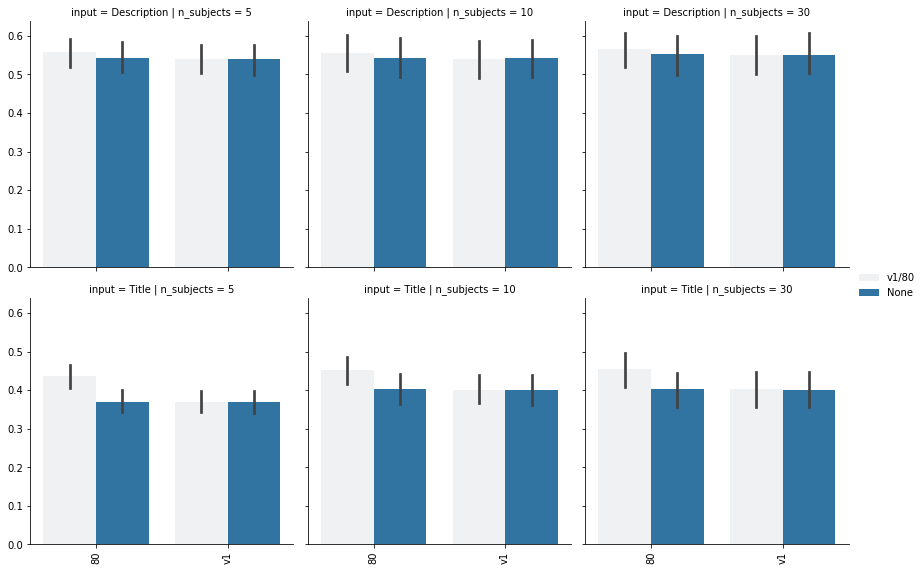

eval_micro-precision


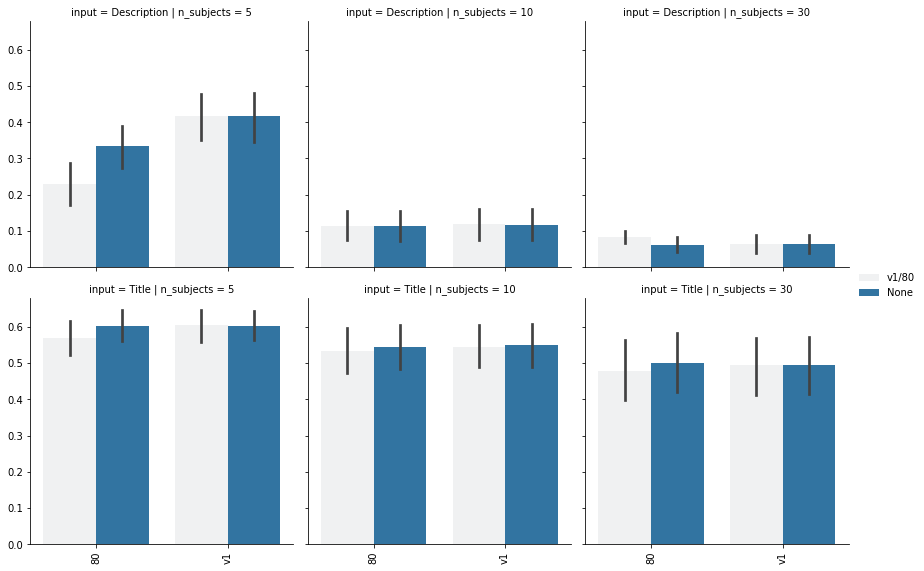

eval_micro-recall


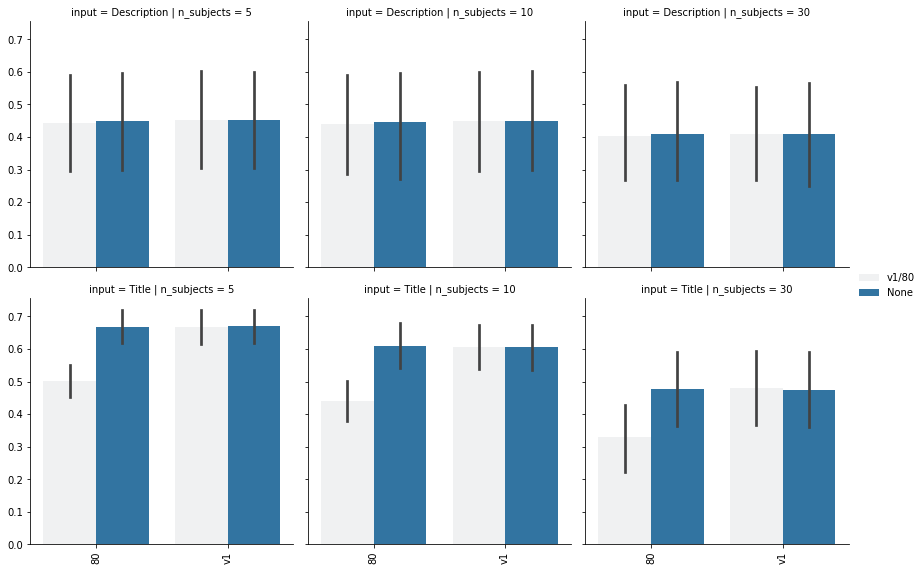

eval_micro-fb1


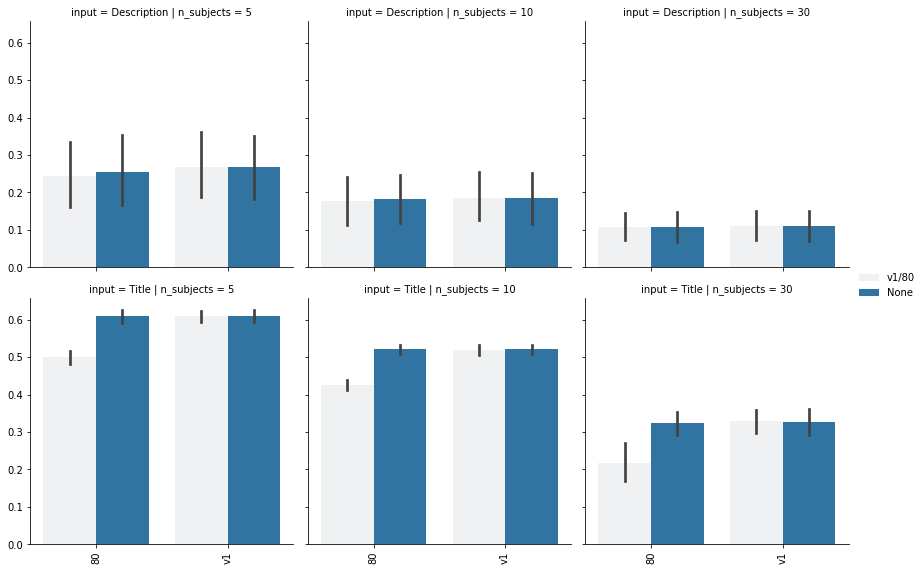

eval_macro-precision


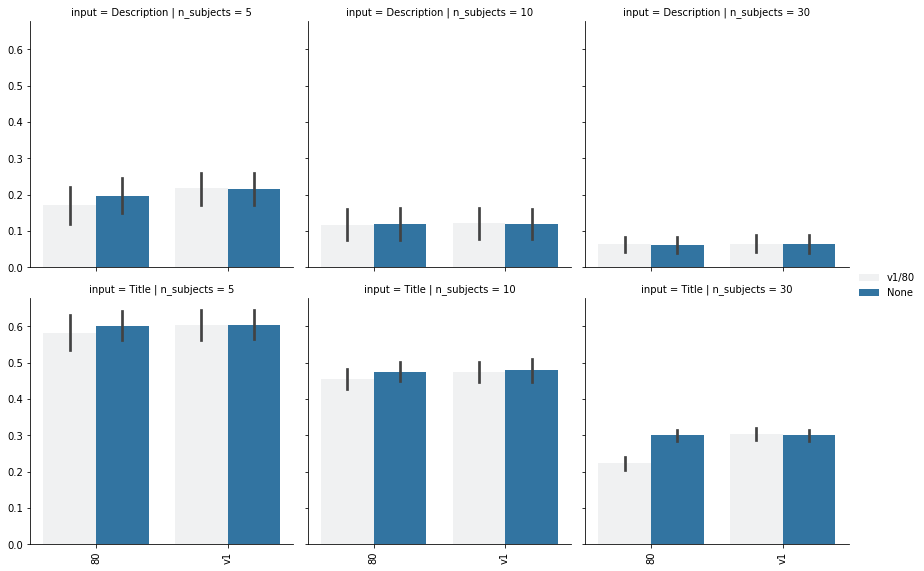

eval_macro-recall


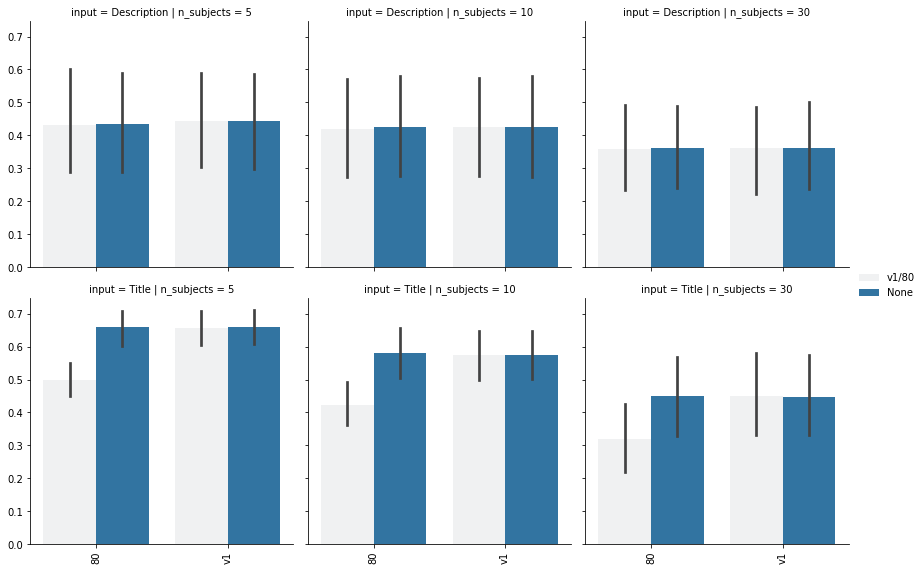

eval_macro-fb1


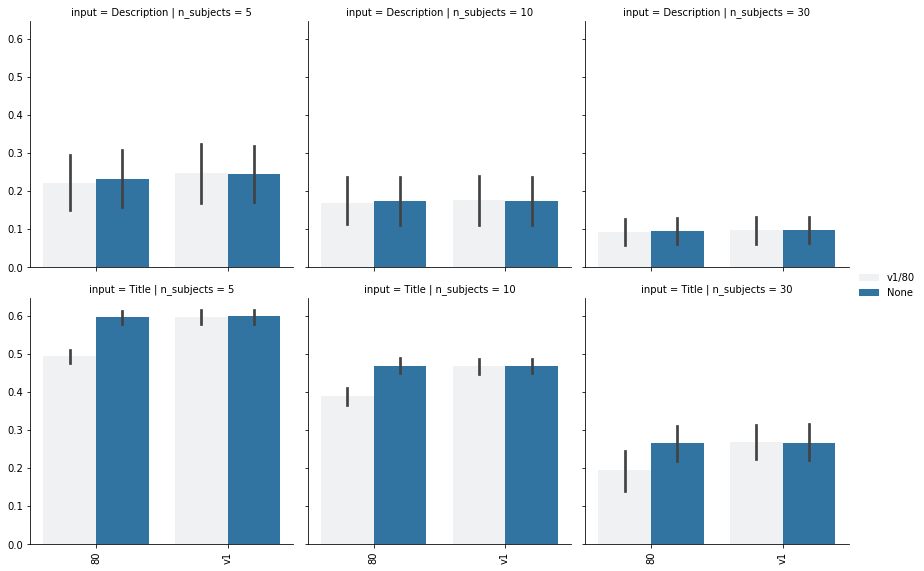

In [283]:
ALL_COLS = ['model_pipeline', 'model_dataset', 'split', 'dataset', 'subject', 
    'text_col', 'meta_pipeline', 'use_class_weights', 'tokenizer', 'training_epochs', 'nrun', 'model_shortform',
           'meta_pipeline_clean']
ALL_COLS_LESS_METAPIPE = ['model_pipeline', 'model_dataset', 'split', 'dataset', 'subject', 
    'text_col', 'use_class_weights', 'tokenizer', 'training_epochs', 'nrun', 'model_shortform', 'n_subjects', 
                          'input']

x= bert_eval_data_avg_across_runs.reset_index()
y = x[x.meta_pipeline_binary == 'Special']
display(y.model_shortform.unique())
y = y.set_index(ALL_COLS_LESS_METAPIPE)

x = bert_eval_data_avg_across_runs.reset_index()
x = x[(x['finished'] == True) &
      (x['tokenizer'] == 'pretrained') &
      (x['training_epochs'] == '1m') & 
      (x['model_shortform'].isin(y.reset_index().model_shortform.unique()))
     ]

x = x.set_index(ALL_COLS_LESS_METAPIPE)
x.loc[y.index]

x = x.groupby(['model_pipeline',
    'model_shortform', 'model_dataset', 'split', 'dataset', 'subject', 
    'text_col', 'use_class_weights', 'tokenizer', 'training_epochs', 'meta_pipeline_clean',
    'n_subjects', 'input'
]).mean()
x = x.reset_index()
display(x)
display(x.model_shortform.unique())

model_order = ['pretrained', 'v1_a', 'v1_ab', 'v1_abd', '80_a', '80_ab', '80_abd']
model_pipeline_order = ['pretrained', 'v1', '80', '90', 'plus']
model_dataset_order = ['pretrained', 'a', 'ab', 'abd']
meta_pipeline_order = ['None', 'v1', '80'] #x.meta_pipeline_clean.unique()
x['meta_pipeline_binary_clean'] = x.meta_pipeline_clean.apply(lambda x: 'v1/80' if x in ['v1', '80'] else 'None')
display(x)
for col in x.filter(regex='eval_[ml]'):
    print(col)
    g = sns.FacetGrid(data=x, col='n_subjects', row='input', col_order=['5','10','30'], height=4, aspect=1)
    g.map_dataframe(sns.barplot, hue='meta_pipeline_binary_clean', y=col, x='model_pipeline',
                    hue_order=['v1/80', 'None'],)
                   #hue_order=[False, True])
    g.add_legend()
    
    for ax in g.axes.ravel():
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    plt.show()

## Use class weights?

array(['80_a', '80_ab', '80_abd', 'v1_a', 'v1_ab', 'v1_abd'], dtype=object)

,model_pipeline,model_shortform,model_dataset,split,dataset,subject,text_col,use_class_weights,tokenizer,training_epochs,...,eval_micro-recall,eval_micro-fb1,eval_macro-precision,eval_macro-recall,eval_macro-fb1,eval_runtime,eval_samples_per_second,epoch,train_runtime,train_samples_per_second
0,80,80_a,a,0,small,subject_30,desc_en_en_50_3000,False,pretrained,1m,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.505400,417.516667,3.0,NaN,NaN
1,80,80_a,a,0,small,subject_30,desc_en_en_50_3000,True,pretrained,1m,...,0.770115,0.174008,0.093760,0.627842,0.128994,0.514367,410.374667,3.0,NaN,NaN
2,80,80_a,a,0,small,subject_30,title_merged,False,pretrained,1m,...,0.131420,0.219774,0.245537,0.094347,0.121714,4.462667,447.267000,3.0,NaN,NaN
3,80,80_a,a,0,small,subject_30,title_merged,True,pretrained,1m,...,0.837238,0.383935,0.274505,0.825208,0.374708,4.490767,444.471000,3.0,NaN,NaN
4,80,80_a,a,0,small,subject_5,desc_en_en_50_3000,False,pretrained,1m,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.505033,417.827667,3.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,v1,v1_abd,abd,4,small,subject_5,title_merged,True,pretrained,1m,...,0.664263,0.529458,0.436312,0.646198,0.514995,4.425533,451.020333,3.0,NaN,NaN
566,v1,v1_abd,abd,4,small,subject_desc_t10,desc_en_en_50_3000,False,pretrained,1m,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.506300,414.885000,3.0,NaN,NaN
567,v1,v1_abd,abd,4,small,subject_desc_t10,desc_en_en_50_3000,True,pretrained,1m,...,0.882420,0.367828,0.240596,0.858747,0.356336,0.123767,1698.038333,3.0,NaN,NaN
568,v1,v1_abd,abd,4,small,subject_desc_t10,title_merged,False,pretrained,1m,...,0.345006,0.463759,0.521103,0.302134,0.369179,4.429767,450.590667,3.0,NaN,NaN


array(['80_a', '80_ab', '80_abd', '90_ab', '90_abd', 'plus_a', 'plus_ab',
       'plus_abd', 'pretrained', 'v1_a', 'v1_ab', 'v1_abd'], dtype=object)

,model_pipeline,model_shortform,model_dataset,split,dataset,subject,text_col,use_class_weights,tokenizer,training_epochs,...,eval_micro-fb1,eval_macro-precision,eval_macro-recall,eval_macro-fb1,eval_runtime,eval_samples_per_second,epoch,train_runtime,train_samples_per_second,meta_pipeline_binary_clean
0,80,80_a,a,0,small,subject_30,desc_en_en_50_3000,False,pretrained,1m,...,0.000000,0.000000,0.000000,0.000000,0.505400,417.516667,3.0,NaN,NaN,None
1,80,80_a,a,0,small,subject_30,desc_en_en_50_3000,True,pretrained,1m,...,0.174008,0.093760,0.627842,0.128994,0.514367,410.374667,3.0,NaN,NaN,None
2,80,80_a,a,0,small,subject_30,title_merged,False,pretrained,1m,...,0.219774,0.245537,0.094347,0.121714,4.462667,447.267000,3.0,NaN,NaN,None
3,80,80_a,a,0,small,subject_30,title_merged,True,pretrained,1m,...,0.383935,0.274505,0.825208,0.374708,4.490767,444.471000,3.0,NaN,NaN,None
4,80,80_a,a,0,small,subject_5,desc_en_en_50_3000,False,pretrained,1m,...,0.000000,0.000000,0.000000,0.000000,0.505033,417.827667,3.0,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,v1,v1_abd,abd,4,small,subject_5,title_merged,True,pretrained,1m,...,0.529458,0.436312,0.646198,0.514995,4.425533,451.020333,3.0,NaN,NaN,None
566,v1,v1_abd,abd,4,small,subject_desc_t10,desc_en_en_50_3000,False,pretrained,1m,...,0.000000,0.000000,0.000000,0.000000,0.506300,414.885000,3.0,NaN,NaN,None
567,v1,v1_abd,abd,4,small,subject_desc_t10,desc_en_en_50_3000,True,pretrained,1m,...,0.367828,0.240596,0.858747,0.356336,0.123767,1698.038333,3.0,NaN,NaN,None
568,v1,v1_abd,abd,4,small,subject_desc_t10,title_merged,False,pretrained,1m,...,0.463759,0.521103,0.302134,0.369179,4.429767,450.590667,3.0,NaN,NaN,None


eval_loss


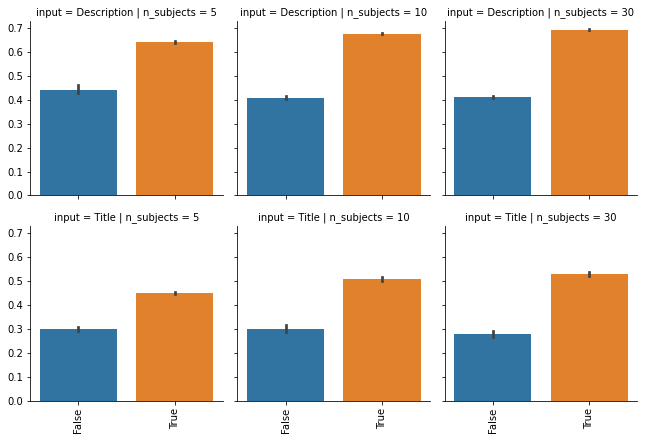

eval_micro-precision


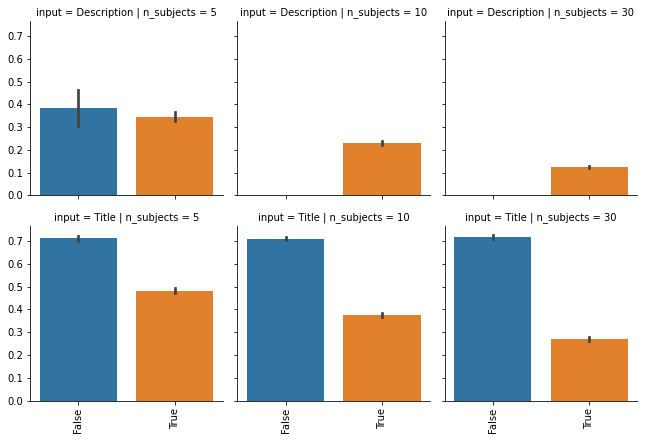

eval_micro-recall


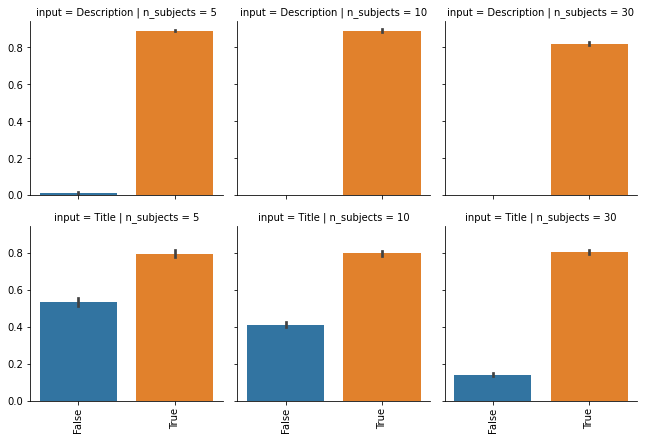

eval_micro-fb1


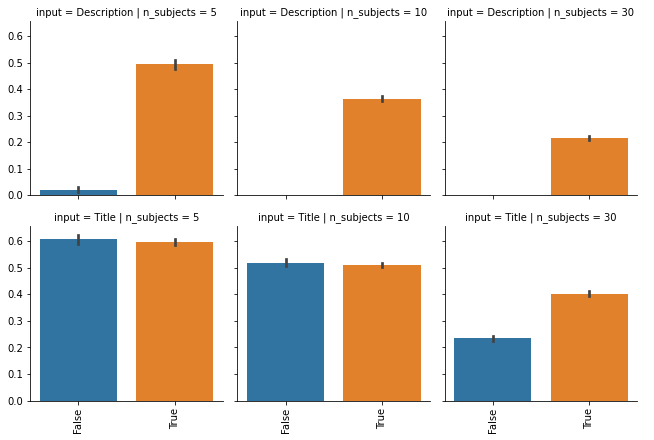

eval_macro-precision


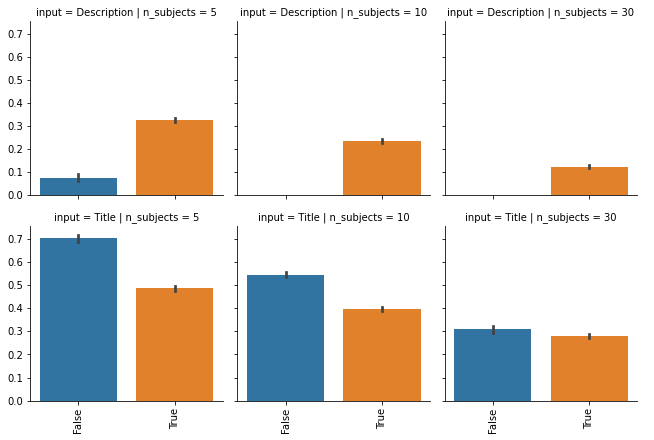

eval_macro-recall


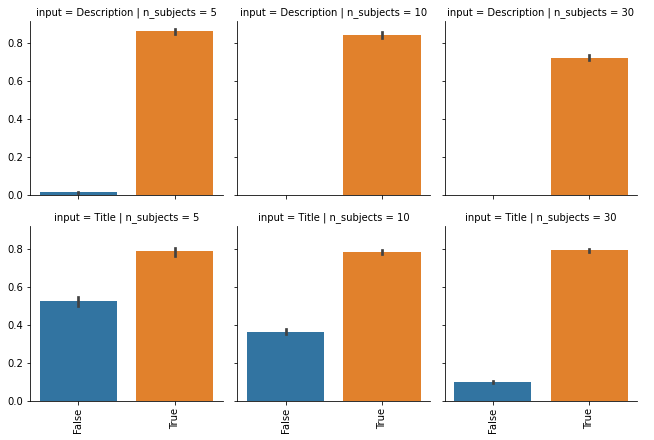

eval_macro-fb1


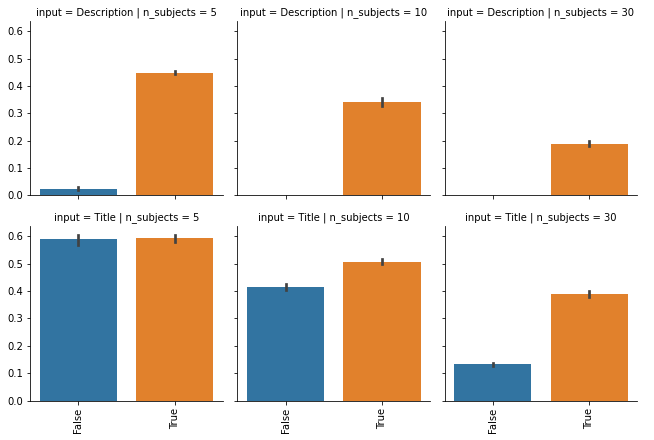

In [156]:
ALL_COLS = ['model_pipeline', 'model_dataset', 'split', 'dataset', 'subject', 
    'text_col', 'meta_pipeline', 'use_class_weights', 'tokenizer', 'training_epochs', 'nrun', 'model_shortform',
           'meta_pipeline_clean']
ALL_COLS_LESS_METAPIPE = ['model_pipeline', 'model_dataset', 'split', 'dataset', 'subject', 
    'text_col', 'use_class_weights', 'tokenizer', 'training_epochs', 'nrun', 'model_shortform', 'n_subjects', 
                          'input']

x= bert_eval_data_avg_across_runs.reset_index()
y = x[x.meta_pipeline_binary == 'Special']
display(y.model_shortform.unique())
y = y.set_index(ALL_COLS_LESS_METAPIPE)

x = bert_eval_data_avg_across_runs.reset_index()
x = x[(x['finished'] == True) &
      (x['tokenizer'] == 'pretrained') &
      (x['training_epochs'] == '1m') & 
      (x['meta_pipeline_clean'] == 'None')
     ]

x = x.set_index(ALL_COLS_LESS_METAPIPE)
x.loc[y.index]

x = x.groupby(['model_pipeline',
    'model_shortform', 'model_dataset', 'split', 'dataset', 'subject', 
    'text_col', 'use_class_weights', 'tokenizer', 'training_epochs', 'meta_pipeline_clean',
    'n_subjects', 'input'
]).mean()
x = x.reset_index()
display(x)
display(x.model_shortform.unique())

model_order = ['pretrained', 'v1_a', 'v1_ab', 'v1_abd', '80_a', '80_ab', '80_abd']
model_pipeline_order = ['pretrained', 'v1', '80', '90', 'plus']
model_dataset_order = ['pretrained', 'a', 'ab', 'abd']
meta_pipeline_order = ['None', 'v1', '80'] 
x['meta_pipeline_binary_clean'] = x.meta_pipeline_clean.apply(lambda x: 'v1/80' if x in ['v1', '80'] else 'None')
display(x)
for col in x.filter(regex='eval_[ml]'):
    print(col)
    g = sns.FacetGrid(data=x, col='n_subjects', row='input', col_order=['5','10','30'], height=3, aspect=1)
    g.map_dataframe(sns.barplot, y=col, x='use_class_weights',
    palette=sns.color_palette())

    g.add_legend()
    
    for ax in g.axes.ravel():
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    plt.show()

## Dataset and pipline of the *model*

,model_pipeline,model_shortform,model_dataset,split,dataset,subject,text_col,use_class_weights,tokenizer,training_epochs,...,eval_micro-recall,eval_micro-fb1,eval_macro-precision,eval_macro-recall,eval_macro-fb1,eval_runtime,eval_samples_per_second,epoch,train_runtime,train_samples_per_second
0,80,80_a,A,0,small,subject_30,desc_en_en_50_3000,True,pretrained,1m,...,0.770115,0.174008,0.093760,0.627842,0.128994,0.514367,410.374667,3.0,NaN,NaN
1,80,80_a,A,0,small,subject_30,title_merged,True,pretrained,1m,...,0.837238,0.383935,0.274505,0.825208,0.374708,4.490767,444.471000,3.0,NaN,NaN
2,80,80_a,A,0,small,subject_5,desc_en_en_50_3000,True,pretrained,1m,...,0.886981,0.623514,0.355936,0.780279,0.409371,0.127667,1657.587333,3.0,NaN,NaN
3,80,80_a,A,0,small,subject_5,title_merged,True,pretrained,1m,...,0.852281,0.633025,0.537606,0.843546,0.633129,4.440467,449.505000,3.0,NaN,NaN
4,80,80_a,A,0,small,subject_desc_t10,desc_en_en_50_3000,True,pretrained,1m,...,0.895981,0.360300,0.180275,0.740652,0.238846,0.509867,413.955667,3.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,v1,v1_abd,A+B+D,4,small,subject_30,title_merged,True,pretrained,1m,...,0.763299,0.420893,0.291260,0.745722,0.405167,4.469733,446.562000,3.0,NaN,NaN
356,v1,v1_abd,A+B+D,4,small,subject_5,desc_en_en_50_3000,True,pretrained,1m,...,0.887640,0.475244,0.308309,0.869197,0.434863,0.500733,419.526333,3.0,NaN,NaN
357,v1,v1_abd,A+B+D,4,small,subject_5,title_merged,True,pretrained,1m,...,0.664263,0.529458,0.436312,0.646198,0.514995,4.425533,451.020333,3.0,NaN,NaN
358,v1,v1_abd,A+B+D,4,small,subject_desc_t10,desc_en_en_50_3000,True,pretrained,1m,...,0.882420,0.367828,0.240596,0.858747,0.356336,0.123767,1698.038333,3.0,NaN,NaN


array(['80_a', '80_ab', '80_abd', '90_ab', '90_abd', 'plus_a', 'plus_ab',
       'plus_abd', 'pretrained', 'v1_a', 'v1_ab', 'v1_abd'], dtype=object)

,model_pipeline,model_shortform,model_dataset,split,dataset,subject,text_col,use_class_weights,tokenizer,training_epochs,...,eval_micro-fb1,eval_macro-precision,eval_macro-recall,eval_macro-fb1,eval_runtime,eval_samples_per_second,epoch,train_runtime,train_samples_per_second,meta_pipeline_binary_clean
0,80,80_a,A,0,small,subject_30,desc_en_en_50_3000,True,pretrained,1m,...,0.174008,0.093760,0.627842,0.128994,0.514367,410.374667,3.0,NaN,NaN,None
1,80,80_a,A,0,small,subject_30,title_merged,True,pretrained,1m,...,0.383935,0.274505,0.825208,0.374708,4.490767,444.471000,3.0,NaN,NaN,None
2,80,80_a,A,0,small,subject_5,desc_en_en_50_3000,True,pretrained,1m,...,0.623514,0.355936,0.780279,0.409371,0.127667,1657.587333,3.0,NaN,NaN,None
3,80,80_a,A,0,small,subject_5,title_merged,True,pretrained,1m,...,0.633025,0.537606,0.843546,0.633129,4.440467,449.505000,3.0,NaN,NaN,None
4,80,80_a,A,0,small,subject_desc_t10,desc_en_en_50_3000,True,pretrained,1m,...,0.360300,0.180275,0.740652,0.238846,0.509867,413.955667,3.0,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,v1,v1_abd,A+B+D,4,small,subject_30,title_merged,True,pretrained,1m,...,0.420893,0.291260,0.745722,0.405167,4.469733,446.562000,3.0,NaN,NaN,None
356,v1,v1_abd,A+B+D,4,small,subject_5,desc_en_en_50_3000,True,pretrained,1m,...,0.475244,0.308309,0.869197,0.434863,0.500733,419.526333,3.0,NaN,NaN,None
357,v1,v1_abd,A+B+D,4,small,subject_5,title_merged,True,pretrained,1m,...,0.529458,0.436312,0.646198,0.514995,4.425533,451.020333,3.0,NaN,NaN,None
358,v1,v1_abd,A+B+D,4,small,subject_desc_t10,desc_en_en_50_3000,True,pretrained,1m,...,0.367828,0.240596,0.858747,0.356336,0.123767,1698.038333,3.0,NaN,NaN,None


eval_loss


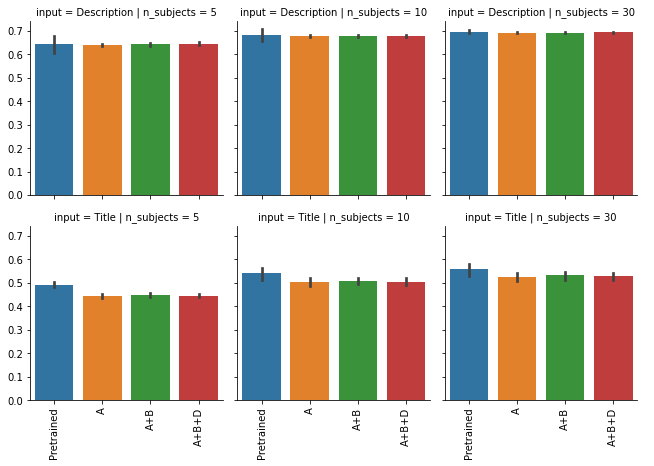

eval_micro-precision


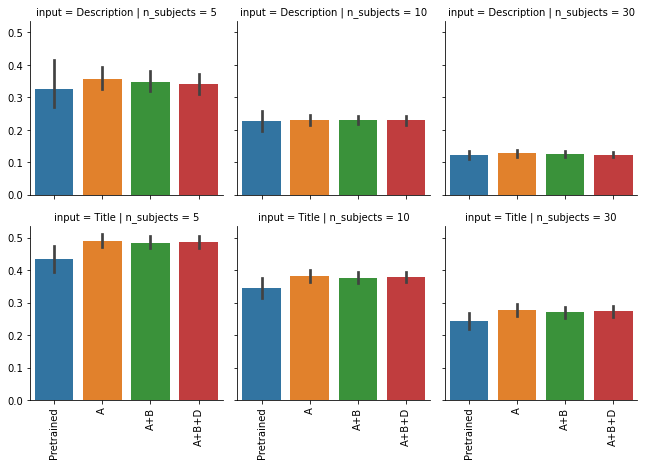

eval_micro-recall


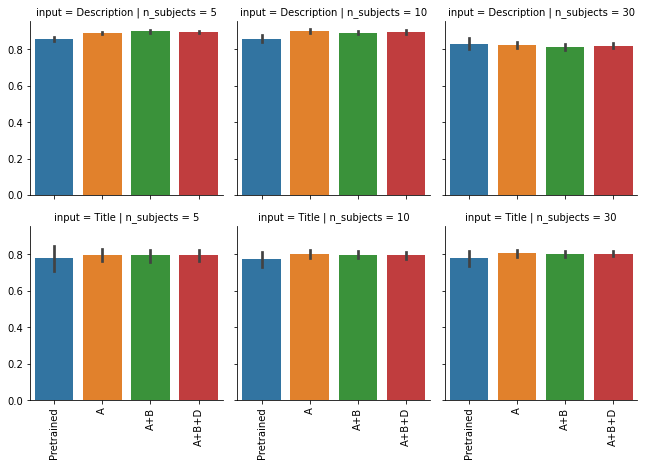

eval_micro-fb1


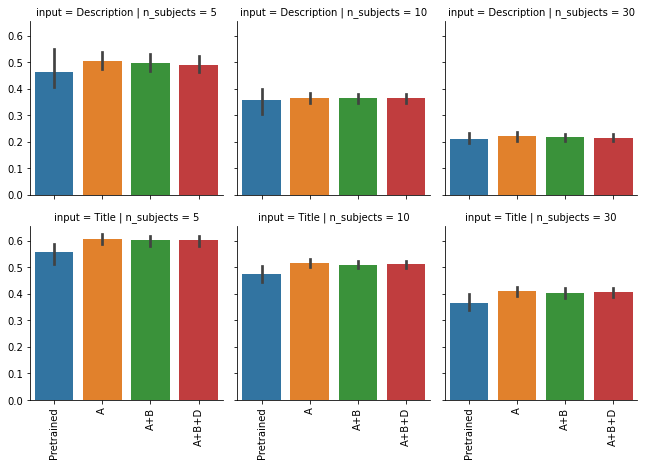

eval_macro-precision


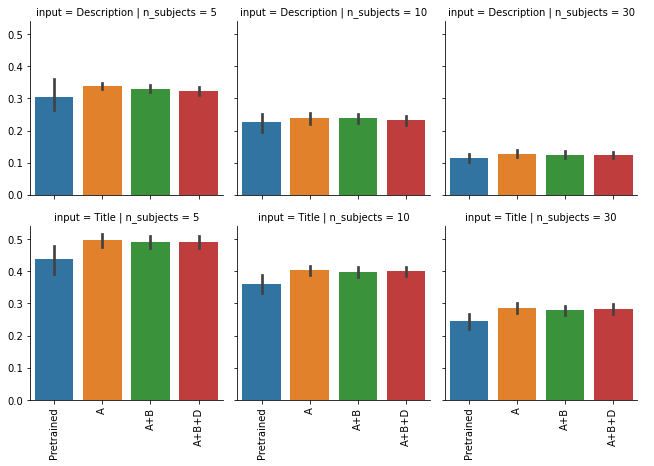

eval_macro-recall


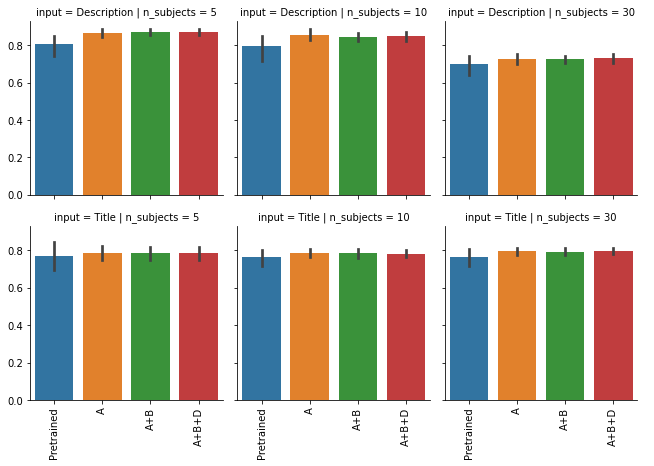

eval_macro-fb1


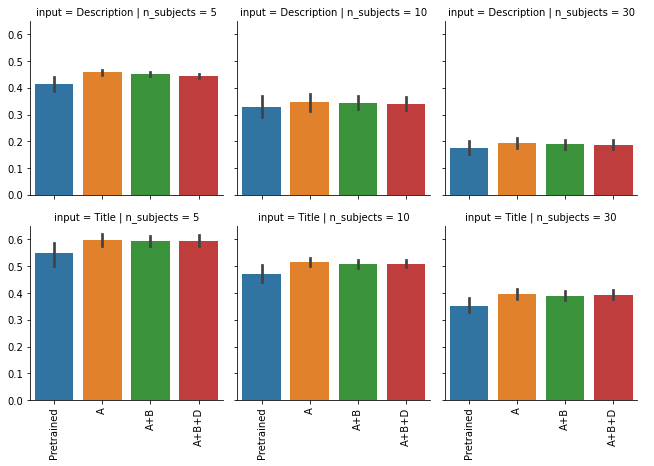

In [172]:
ALL_COLS = ['model_pipeline', 'model_dataset', 'split', 'dataset', 'subject', 
    'text_col', 'meta_pipeline', 'use_class_weights', 'tokenizer', 'training_epochs', 'nrun', 'model_shortform',
           'meta_pipeline_clean']
ALL_COLS_LESS_METAPIPE = ['model_pipeline', 'model_dataset', 'split', 'dataset', 'subject', 
    'text_col', 'use_class_weights', 'tokenizer', 'training_epochs', 'nrun', 'model_shortform', 'n_subjects', 
                          'input']

x = bert_eval_data_avg_across_runs.reset_index()
x = x[(x['finished'] == True) &
      (x['tokenizer'] == 'pretrained') &
      (x['training_epochs'] == '1m') & 
      (x['meta_pipeline_clean'] == 'None') &
      (x['use_class_weights'] == True)
      #(x.model_shortform != 'other') #&
      #(x.text_col == "title_merged")
     ]
display(x)

x = x.groupby(['model_pipeline',
    'model_shortform', 'model_dataset', 'split', 'dataset', 'subject', 
    'text_col', 'use_class_weights', 'tokenizer', 'training_epochs', 'meta_pipeline_clean',
    'n_subjects', 'input'
]).mean()
x = x.reset_index()
display(x)
display(x.model_shortform.unique())

model_order = ['pretrained', 'v1_a', 'v1_ab', 'v1_abd', '80_a', '80_ab', '80_abd']
model_pipeline_order = ['pretrained', 'v1', '80', '90', 'PLUS']
model_dataset_order = ['Pretrained', 'A', 'A+B', 'A+B+D']
meta_pipeline_order = ['None', 'v1', '80'] 
x['meta_pipeline_binary_clean'] = x.meta_pipeline_clean.apply(lambda x: 'v1/80' if x in ['v1', '80'] else 'None')
display(x)
for col in x.filter(regex='eval_[ml]'):
    print(col)
    g = sns.FacetGrid(data=x, col='n_subjects', row='input', col_order=['5','10','30'], height=3, aspect=1)
    g.map_dataframe(sns.barplot, y=col, x='model_dataset', 
        palette=sns.color_palette(),
        order=model_dataset_order) 
   
    g.add_legend()
    
    for ax in g.axes.ravel():
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    plt.show()

## Pipelines?

,model_pipeline,model_shortform,model_dataset,split,dataset,subject,text_col,use_class_weights,tokenizer,training_epochs,...,eval_micro-recall,eval_micro-fb1,eval_macro-precision,eval_macro-recall,eval_macro-fb1,eval_runtime,eval_samples_per_second,epoch,train_runtime,train_samples_per_second
0,80,80_a,A,0,small,subject_30,desc_en_en_50_3000,True,pretrained,1m,...,0.770115,0.174008,0.093760,0.627842,0.128994,0.514367,410.374667,3.0,NaN,NaN
1,80,80_a,A,0,small,subject_30,title_merged,True,pretrained,1m,...,0.837238,0.383935,0.274505,0.825208,0.374708,4.490767,444.471000,3.0,NaN,NaN
2,80,80_a,A,0,small,subject_5,desc_en_en_50_3000,True,pretrained,1m,...,0.886981,0.623514,0.355936,0.780279,0.409371,0.127667,1657.587333,3.0,NaN,NaN
3,80,80_a,A,0,small,subject_5,title_merged,True,pretrained,1m,...,0.852281,0.633025,0.537606,0.843546,0.633129,4.440467,449.505000,3.0,NaN,NaN
4,80,80_a,A,0,small,subject_desc_t10,desc_en_en_50_3000,True,pretrained,1m,...,0.895981,0.360300,0.180275,0.740652,0.238846,0.509867,413.955667,3.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,v1,v1_abd,A+B+D,4,small,subject_30,title_merged,True,pretrained,1m,...,0.763299,0.420893,0.291260,0.745722,0.405167,4.469733,446.562000,3.0,NaN,NaN
356,v1,v1_abd,A+B+D,4,small,subject_5,desc_en_en_50_3000,True,pretrained,1m,...,0.887640,0.475244,0.308309,0.869197,0.434863,0.500733,419.526333,3.0,NaN,NaN
357,v1,v1_abd,A+B+D,4,small,subject_5,title_merged,True,pretrained,1m,...,0.664263,0.529458,0.436312,0.646198,0.514995,4.425533,451.020333,3.0,NaN,NaN
358,v1,v1_abd,A+B+D,4,small,subject_desc_t10,desc_en_en_50_3000,True,pretrained,1m,...,0.882420,0.367828,0.240596,0.858747,0.356336,0.123767,1698.038333,3.0,NaN,NaN


array(['80_a', '80_ab', '80_abd', '90_ab', '90_abd', 'plus_a', 'plus_ab',
       'plus_abd', 'pretrained', 'v1_a', 'v1_ab', 'v1_abd'], dtype=object)

,model_pipeline,model_shortform,model_dataset,split,dataset,subject,text_col,use_class_weights,tokenizer,training_epochs,...,eval_micro-fb1,eval_macro-precision,eval_macro-recall,eval_macro-fb1,eval_runtime,eval_samples_per_second,epoch,train_runtime,train_samples_per_second,meta_pipeline_binary_clean
0,80,80_a,A,0,small,subject_30,desc_en_en_50_3000,True,pretrained,1m,...,0.174008,0.093760,0.627842,0.128994,0.514367,410.374667,3.0,NaN,NaN,None
1,80,80_a,A,0,small,subject_30,title_merged,True,pretrained,1m,...,0.383935,0.274505,0.825208,0.374708,4.490767,444.471000,3.0,NaN,NaN,None
2,80,80_a,A,0,small,subject_5,desc_en_en_50_3000,True,pretrained,1m,...,0.623514,0.355936,0.780279,0.409371,0.127667,1657.587333,3.0,NaN,NaN,None
3,80,80_a,A,0,small,subject_5,title_merged,True,pretrained,1m,...,0.633025,0.537606,0.843546,0.633129,4.440467,449.505000,3.0,NaN,NaN,None
4,80,80_a,A,0,small,subject_desc_t10,desc_en_en_50_3000,True,pretrained,1m,...,0.360300,0.180275,0.740652,0.238846,0.509867,413.955667,3.0,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,v1,v1_abd,A+B+D,4,small,subject_30,title_merged,True,pretrained,1m,...,0.420893,0.291260,0.745722,0.405167,4.469733,446.562000,3.0,NaN,NaN,None
356,v1,v1_abd,A+B+D,4,small,subject_5,desc_en_en_50_3000,True,pretrained,1m,...,0.475244,0.308309,0.869197,0.434863,0.500733,419.526333,3.0,NaN,NaN,None
357,v1,v1_abd,A+B+D,4,small,subject_5,title_merged,True,pretrained,1m,...,0.529458,0.436312,0.646198,0.514995,4.425533,451.020333,3.0,NaN,NaN,None
358,v1,v1_abd,A+B+D,4,small,subject_desc_t10,desc_en_en_50_3000,True,pretrained,1m,...,0.367828,0.240596,0.858747,0.356336,0.123767,1698.038333,3.0,NaN,NaN,None


eval_loss


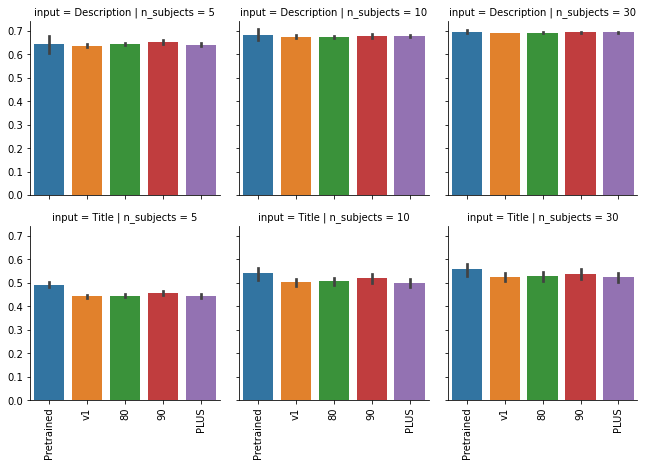

eval_micro-precision


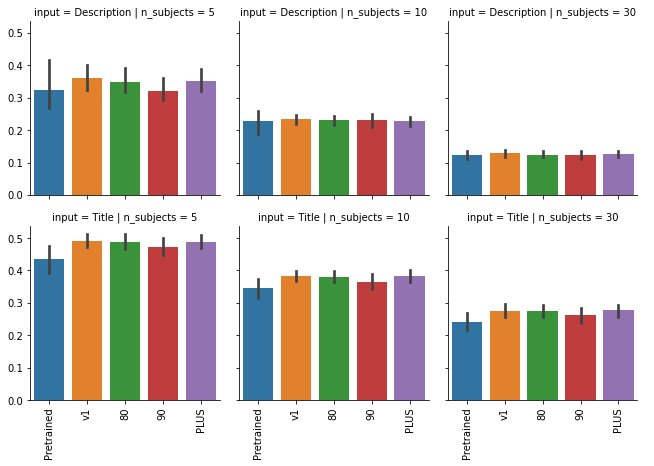

eval_micro-recall


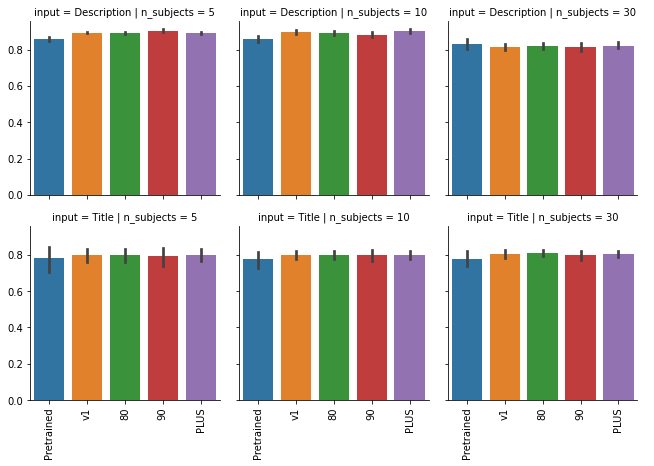

eval_micro-fb1


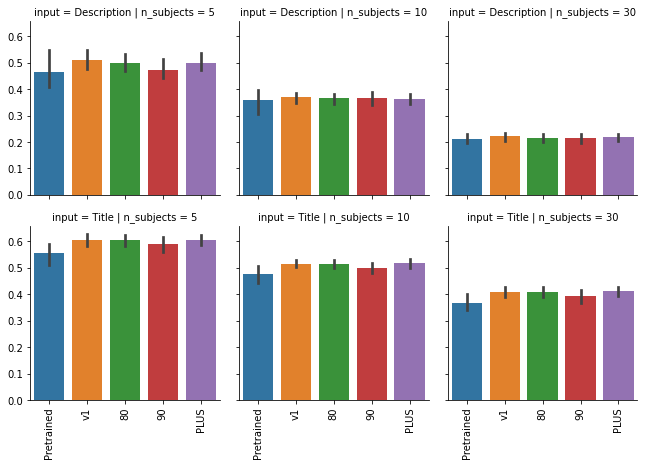

eval_macro-precision


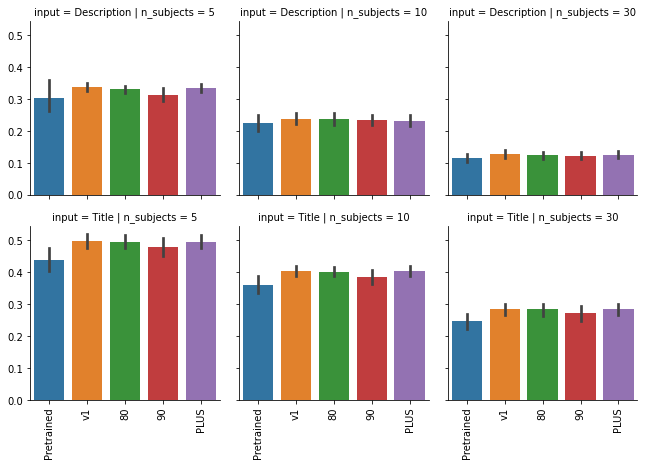

eval_macro-recall


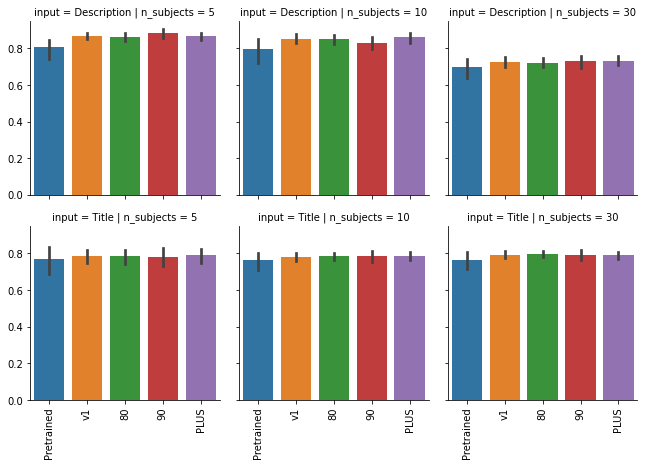

eval_macro-fb1


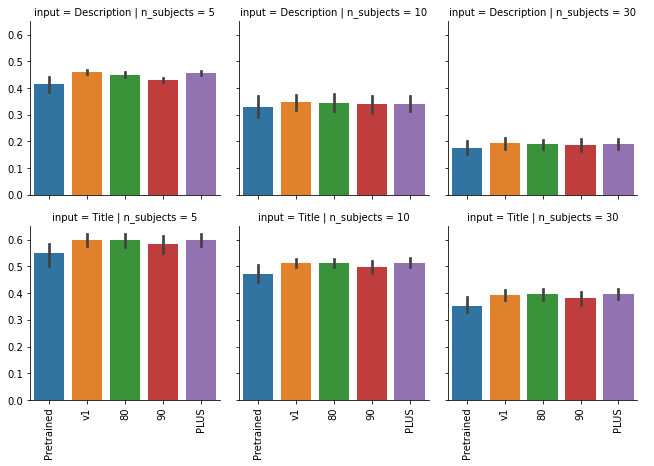

In [175]:
ALL_COLS = ['model_pipeline', 'model_dataset', 'split', 'dataset', 'subject', 
    'text_col', 'meta_pipeline', 'use_class_weights', 'tokenizer', 'training_epochs', 'nrun', 'model_shortform',
           'meta_pipeline_clean']
ALL_COLS_LESS_METAPIPE = ['model_pipeline', 'model_dataset', 'split', 'dataset', 'subject', 
    'text_col', 'use_class_weights', 'tokenizer', 'training_epochs', 'nrun', 'model_shortform', 'n_subjects', 
                          'input']

x = bert_eval_data_avg_across_runs.reset_index()
x = x[(x['finished'] == True) &
      (x['tokenizer'] == 'pretrained') &
      (x['training_epochs'] == '1m') & 
      (x['meta_pipeline_clean'] == 'None') &
      (x['use_class_weights'] == True)
     ]


x = x.groupby(['model_pipeline',
    'model_shortform', 'model_dataset', 'split', 'dataset', 'subject', 
    'text_col', 'use_class_weights', 'tokenizer', 'training_epochs', 'meta_pipeline_clean',
    'n_subjects', 'input'
]).mean()
x = x.reset_index()
display(x)
display(x.model_shortform.unique())

model_order = ['Pretrained', 'v1_a', 'v1_ab', 'v1_abd', '80_a', '80_ab', '80_abd']
model_pipeline_order = ['Pretrained', 'v1', '80', '90', 'PLUS']
model_dataset_order = ['Pretrained', 'A', 'A+B', 'A+B+D']
meta_pipeline_order = ['None', 'v1', '80'] 
x['meta_pipeline_binary_clean'] = x.meta_pipeline_clean.apply(lambda x: 'v1/80' if x in ['v1', '80'] else 'None')
display(x)
for col in x.filter(regex='eval_[ml]'):
    print(col)
    g = sns.FacetGrid(data=x, col='n_subjects', row='input', col_order=['5','10','30'], height=3, aspect=1)
    g.map_dataframe(sns.barplot, y=col, x='model_pipeline',
        palette=sns.color_palette(),
        order=model_pipeline_order) 
    g.add_legend()
    
    for ax in g.axes.ravel():
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    plt.show()

## Across tokenizers

Careful to only use datasets/pipelines for which we actually trained different tokenizers...

run_dir_full  \
model_pipeline model_dataset split dataset subject          text_col           use_class_weights training_epochs nrun n_subjects input                                                            
80             A+B           0     small   subject_5        title_merged       True              1m              0    5          Title        /nrcan_p2/data/07_model_output/keyword_predict...   
                                                                                                                 1    5          Title        /nrcan_p2/data/07_model_output/keyword_predict...   
                                                                                                                 2    5          Title        /nrcan_p2/data/07_model_output/keyword_predict...   
                             1     small   subject_5        title_merged       True              1m              0    5          Title        /nrcan_p2/data/07_model_output/keyword_predict...   
                                                                                                                 1    5          Title        /nrcan_p2/data/07_model_output/keyword_predict...   
...                                                                                                                                                                                         ...   
               A             3     small   subject_desc_t10 desc_en_en_50_3000 True              1m              1    10         Description  /nrcan_p2/data/07_model_output/keyword_predict...   
                                                                                                                 2    10         Description  /nrcan_p2/data/07_model_output/keyword_predict...   
                             4     small   subject_desc_t10 desc_en_en_50_3000 True              1m              0    10         Description  /nrcan_p2/data/07_model_output/keyword_predict...   
                                                                                                                 1    10         Description  /nrcan_p2/data/07_model_output/keyword_predict...   
                                                                                                                 2    10         Description  /nrcan_p2/data/07_model_output/keyword_predict...   

                                                                                                                                             train/eval  \
model_pipeline model_dataset split dataset subject          text_col           use_class_weights training_epochs nrun n_subjects input                    
80             A+B           0     small   subject_5        title_merged       True              1m              0    5          Title             eval   
                                                                                                                 1    5          Title             eval   
                                                                                                                 2    5          Title             eval   
                             1     small   subject_5        title_merged       True              1m              0    5          Title             eval   
                                                                                                                 1    5          Title             eval   
...                                                                                                                                                 ...   
               A             3     small   subject_desc_t10 desc_en_en_50_3000 True              1m              1    10         Description       eval   
                                                                                                                 2    10         Description       eval   
                             4     small   subject_desc_t10 desc_en_en_50_3000 True          

run_dir_full  \
model_pipeline model_dataset split dataset subject          text_col           use_class_weights training_epochs nrun n_subjects input                                                            
80             A+B           0     small   subject_5        title_merged       True              1m              0    5          Title        /nrcan_p2/data/07_model_output/keyword_predict...   
                                                                                                                                 Title        /nrcan_p2/data/07_model_output/keyword_predict...   
                                                                                                                                 Title        /nrcan_p2/data/07_model_output/keyword_predict...   
                                                                                                                 1    5          Title        /nrcan_p2/data/07_model_output/keyword_predict...   
                                                                                                                                 Title        /nrcan_p2/data/07_model_output/keyword_predict...   
...                                                                                                                                                                                         ...   
               A             4     small   subject_desc_t10 desc_en_en_50_3000 True              1m              1    10         Description  /nrcan_p2/data/07_model_output/keyword_predict...   
                                                                                                                                 Description  /nrcan_p2/data/07_model_output/keyword_predict...   
                                                                                                                 2    10         Description  /nrcan_p2/data/07_model_output/keyword_predict...   
                                                                                                                                 Description  /nrcan_p2/data/07_model_output/keyword_predict...   
                                                                                                                                 Description  /nrcan_p2/data/07_model_output/keyword_predict...   

                                                                                                                                             train/eval  \
model_pipeline model_dataset split dataset subject          text_col           use_class_weights training_epochs nrun n_subjects input                    
80             A+B           0     small   subject_5        title_merged       True              1m              0    5          Title             eval   
                                                                                                                                 Title             eval   
                                                                                                                                 Title             eval   
                                                                                                                 1    5          Title             eval   
                                                                                                                                 Title             eval   
...                                                                                                                                                 ...   
               A             4     small   subject_desc_t10 desc_en_en_50_3000 True              1m              1    10         Description       eval   
                                                                                                                                 Description       eval   
                                                                                             

run_dir_full  \
model_pipeline model_dataset split dataset subject          text_col           use_class_weights training_epochs nrun n_subjects input                                                            
80             A+B           0     small   subject_5        title_merged       True              1m              0    5          Title        /nrcan_p2/data/07_model_output/keyword_predict...   
                                                                                                                                 Title        /nrcan_p2/data/07_model_output/keyword_predict...   
                                                                                                                                 Title        /nrcan_p2/data/07_model_output/keyword_predict...   
                                                                                                                 1    5          Title        /nrcan_p2/data/07_model_output/keyword_predict...   
                                                                                                                                 Title        /nrcan_p2/data/07_model_output/keyword_predict...   
...                                                                                                                                                                                         ...   
               A             4     small   subject_desc_t10 desc_en_en_50_3000 True              1m              1    10         Description  /nrcan_p2/data/07_model_output/keyword_predict...   
                                                                                                                                 Description  /nrcan_p2/data/07_model_output/keyword_predict...   
                                                                                                                 2    10         Description  /nrcan_p2/data/07_model_output/keyword_predict...   
                                                                                                                                 Description  /nrcan_p2/data/07_model_output/keyword_predict...   
                                                                                                                                 Description  /nrcan_p2/data/07_model_output/keyword_predict...   

                                                                                                                                             train/eval  \
model_pipeline model_dataset split dataset subject          text_col           use_class_weights training_epochs nrun n_subjects input                    
80             A+B           0     small   subject_5        title_merged       True              1m              0    5          Title             eval   
                                                                                                                                 Title             eval   
                                                                                                                                 Title             eval   
                                                                                                                 1    5          Title             eval   
                                                                                                                                 Title             eval   
...                                                                                                                                                 ...   
               A             4     small   subject_desc_t10 desc_en_en_50_3000 True              1m              1    10         Description       eval   
                                                                                                                                 Description       eval   
                                                                                             

geo500        295
pretrained    295
geo250        290
geo994         30
Name: tokenizer, dtype: int64

title_merged          460
desc_en_en_50_3000    450
Name: text_col, dtype: int64

subject_5           310
subject_30          310
subject_desc_t10    290
Name: subject, dtype: int64

geo500        295
pretrained    295
geo250        290
geo994         30
Name: tokenizer, dtype: int64

title_merged          460
desc_en_en_50_3000    450
Name: text_col, dtype: int64

,model_pipeline,tokenizer,model_shortform,model_dataset,split,dataset,subject,text_col,use_class_weights,training_epochs,...,eval_micro-fb1,eval_macro-precision,eval_macro-recall,eval_macro-fb1,eval_runtime,eval_samples_per_second,epoch,train_runtime,train_samples_per_second,meta_pipeline_binary_clean
0,80,geo250,80_a_geo250,A,0,small,subject_30,desc_en_en_50_3000,True,1m,...,0.189622,0.101356,0.602282,0.134532,0.519833,405.926667,3.0,NaN,NaN,None
1,80,geo250,80_a_geo250,A,0,small,subject_30,title_merged,True,1m,...,0.381008,0.271423,0.827018,0.371569,4.502233,443.337000,3.0,NaN,NaN,None
2,80,geo250,80_a_geo250,A,0,small,subject_5,desc_en_en_50_3000,True,1m,...,0.664121,0.381624,0.754281,0.441910,0.504300,418.656333,3.0,NaN,NaN,None
3,80,geo250,80_a_geo250,A,0,small,subject_5,title_merged,True,1m,...,0.638663,0.536311,0.878994,0.643552,4.386567,455.027000,3.0,NaN,NaN,None
4,80,geo250,80_a_geo250,A,0,small,subject_desc_t10,desc_en_en_50_3000,True,1m,...,0.376046,0.197538,0.730068,0.256453,0.511533,412.521000,3.0,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,v1,pretrained,v1_abd,A+B+D,4,small,subject_30,title_merged,True,1m,...,0.420893,0.291260,0.745722,0.405167,4.469733,446.562000,3.0,NaN,NaN,None
906,v1,pretrained,v1_abd,A+B+D,4,small,subject_5,desc_en_en_50_3000,True,1m,...,0.475244,0.308309,0.869197,0.434863,0.500733,419.526333,3.0,NaN,NaN,None
907,v1,pretrained,v1_abd,A+B+D,4,small,subject_5,title_merged,True,1m,...,0.529458,0.436312,0.646198,0.514995,4.425533,451.020333,3.0,NaN,NaN,None
908,v1,pretrained,v1_abd,A+B+D,4,small,subject_desc_t10,desc_en_en_50_3000,True,1m,...,0.367828,0.240596,0.858747,0.356336,0.123767,1698.038333,3.0,NaN,NaN,None


eval_loss


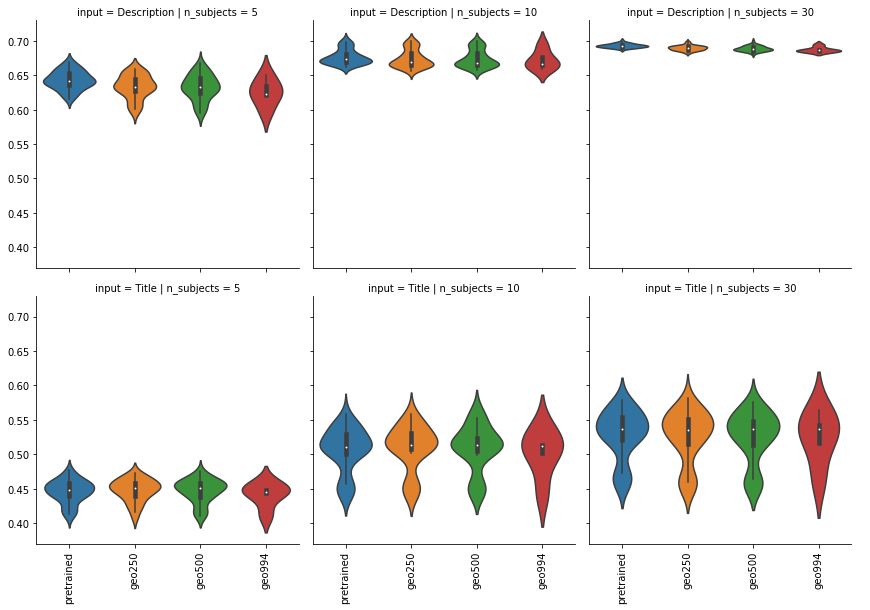

eval_micro-precision


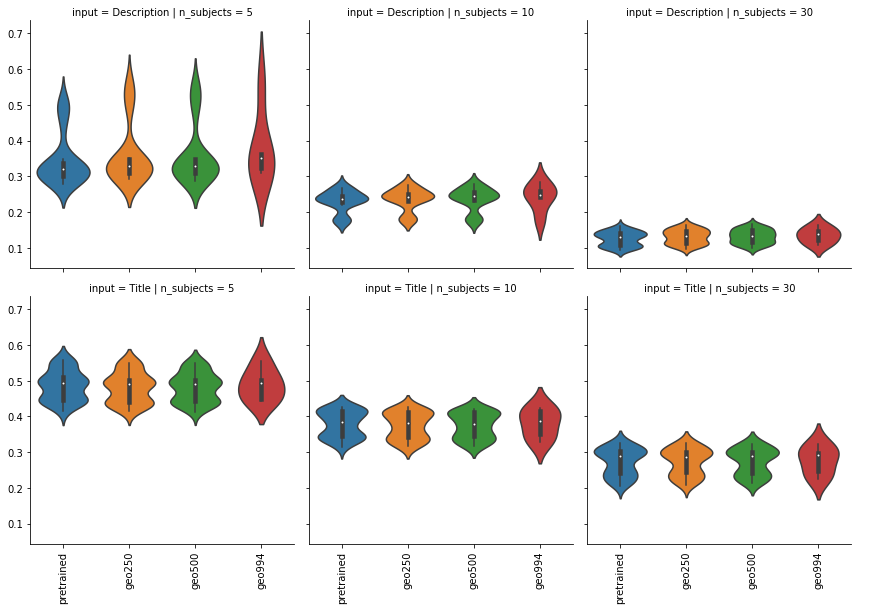

eval_micro-recall


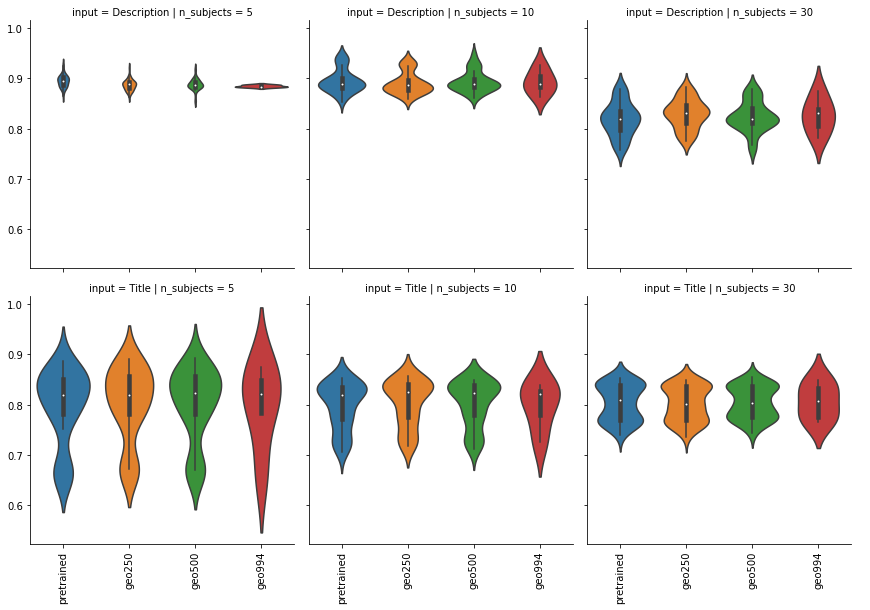

eval_micro-fb1


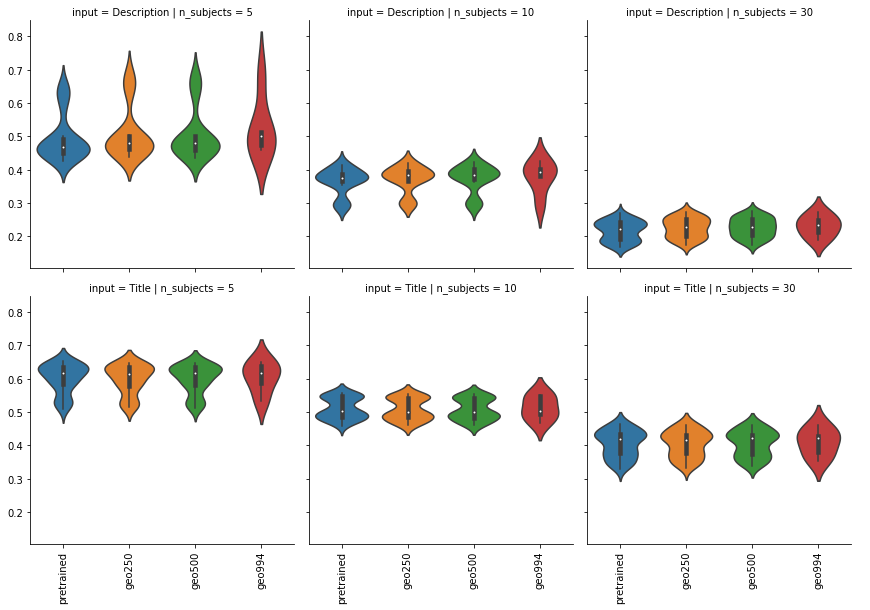

eval_macro-precision


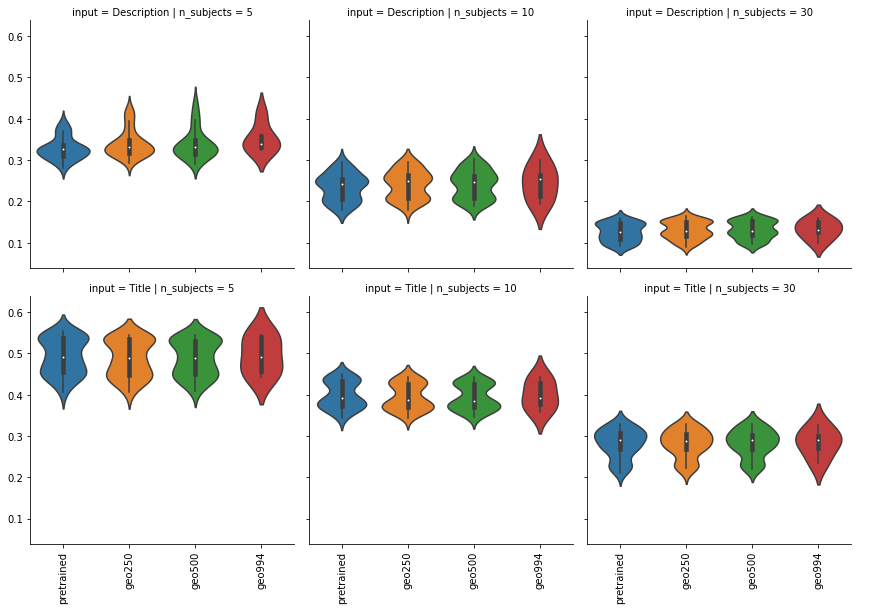

eval_macro-recall


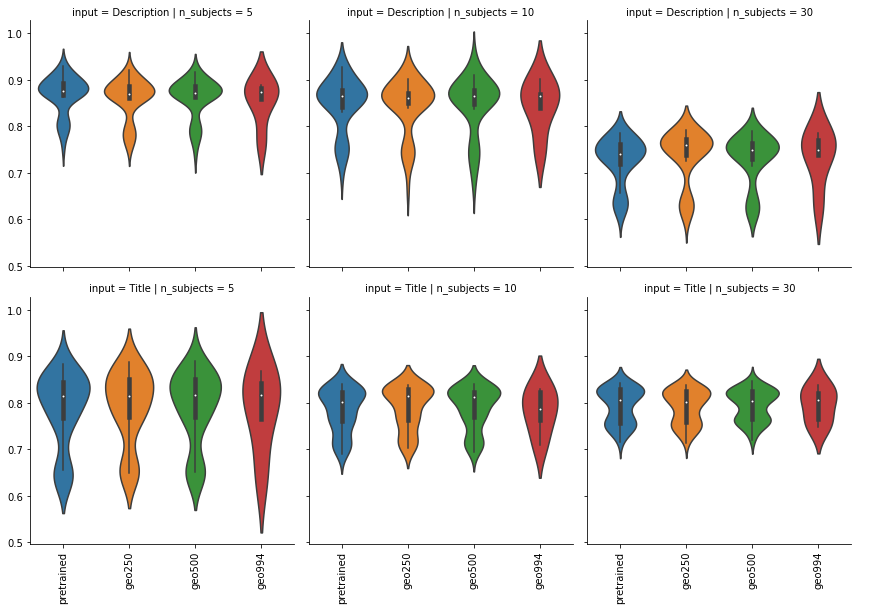

eval_macro-fb1


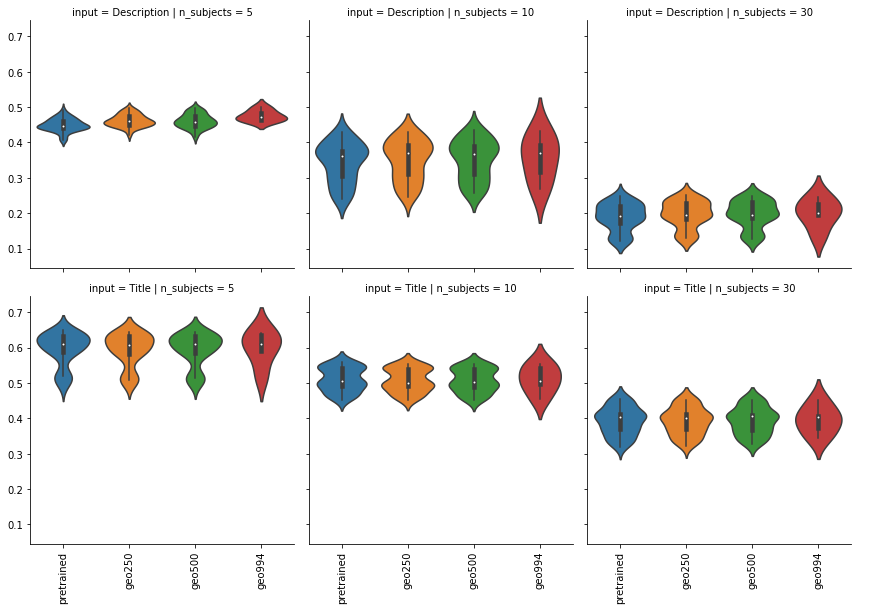

In [288]:
ALL_COLS = ['model_pipeline', 'model_dataset', 'split', 'dataset', 'subject', 
    'text_col', 'meta_pipeline', 'use_class_weights', 'tokenizer', 'training_epochs', 'nrun', 'model_shortform',
           'meta_pipeline_clean']
ALL_COLS_LESS_TOKENIZER = ['model_pipeline', 'model_dataset', 'split', 'dataset', 'subject', 
    'text_col', 'use_class_weights', 'training_epochs', 'nrun', 'n_subjects', 
                          'input']

x= bert_eval_data_avg_across_runs.reset_index()
x = x[(x['finished'] == True) &
      #(x['tokenizer'] == 'pretrained') &
      (x['training_epochs'] == '1m') & 
      (x['meta_pipeline_clean'] == 'None') &
      (x['use_class_weights'] == True) #& 
      #(x['model_pipeline'] == 'PLUS') & 
      #(x['model_dataset'] == 'A')
      #(x.model_shortform != 'other') #&
      #(x.text_col == "title_merged")
     ]

y = x[(x.nrun == 0) & (x.split == 0) & (x.subject == 'subject_5') & (x.text_col == 'title_merged')]
y = x[x.tokenizer == 'geo500']
y = y.set_index(ALL_COLS_LESS_TOKENIZER)
display(y) 

x = x.set_index(ALL_COLS_LESS_TOKENIZER)
x = x.loc[y.index]
display(x)


display(x)
x = x.groupby(['model_pipeline','tokenizer',
    'model_shortform', 'model_dataset', 'split', 'dataset', 'subject', 
    'text_col', 'use_class_weights', 'training_epochs', 'meta_pipeline_clean',#'tokenizer', 
    'n_subjects', 'input'
]).mean() 
x

display(x.reset_index().tokenizer.value_counts())
display(x.reset_index().text_col.value_counts())
display(x.reset_index().subject.value_counts())
display(x.reset_index().tokenizer.value_counts())
display(x.reset_index().text_col.value_counts())


model_order = ['Pretrained', 'v1_a', 'v1_ab', 'v1_abd', '80_a', '80_ab', '80_abd']
model_pipeline_order = ['Pretrained', 'v1', '80', '90', 'PLUS']
model_dataset_order = ['Pretrained', 'A', 'A+B', 'A+B+D']
meta_pipeline_order = ['None', 'v1', '80'] 
tokenizer_order = ['pretrained', 'geo250', 'geo500', 'geo994']
x = x.reset_index()
x['meta_pipeline_binary_clean'] = x.meta_pipeline_clean.apply(lambda x: 'v1/80' if x in ['v1', '80'] else 'None')
display(x)
for col in x.filter(regex='eval_[ml]'):
    print(col)
    g = sns.FacetGrid(data=x, col='n_subjects', row='input', col_order=['5','10','30'], height=4, aspect=1)
    g.map_dataframe(sns.violinplot, y=col, x='tokenizer', order=tokenizer_order,
        palette=sns.color_palette(),
    )
    
    g.add_legend()
    
    for ax in g.axes.ravel():
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    plt.show()

## Across tokenizers vs datasets

,run_dir_full,split,nrun,train/eval,dataset,subject,input,n_subjects,text_col,meta_pipeline,...,eval_micro-recall,eval_micro-fb1,eval_macro-precision,eval_macro-recall,eval_macro-fb1,eval_runtime,eval_samples_per_second,epoch,train_runtime,train_samples_per_second
30,/nrcan_p2/data/07_model_output/keyword_predict...,0,0,eval,small,subject_30,Title,30,title_merged,None_None,...,0.830877,0.355024,0.245649,0.819696,0.344174,4.5079,442.780,3.0,NaN,NaN
31,/nrcan_p2/data/07_model_output/keyword_predict...,0,1,eval,small,subject_30,Title,30,title_merged,None_None,...,0.822343,0.348432,0.244790,0.814398,0.341130,4.4848,445.063,3.0,NaN,NaN
32,/nrcan_p2/data/07_model_output/keyword_predict...,0,2,eval,small,subject_30,Title,30,title_merged,None_None,...,0.835066,0.344812,0.239469,0.830896,0.338662,4.5067,442.901,3.0,NaN,NaN
33,/nrcan_p2/data/07_model_output/keyword_predict...,1,0,eval,small,subject_30,Title,30,title_merged,None_None,...,0.816806,0.326271,0.207208,0.795339,0.313330,4.4895,444.596,3.0,NaN,NaN
34,/nrcan_p2/data/07_model_output/keyword_predict...,1,1,eval,small,subject_30,Title,30,title_merged,None_None,...,0.828472,0.325433,0.206646,0.815447,0.314224,4.4897,444.577,3.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,/nrcan_p2/data/07_model_output/keyword_predict...,3,1,eval,small,subject_desc_t10,Description,10,desc_en_en_50_3000,None_None,...,0.925781,0.389163,0.263965,0.894235,0.392926,0.5104,413.407,3.0,NaN,NaN
4916,/nrcan_p2/data/07_model_output/keyword_predict...,3,2,eval,small,subject_desc_t10,Description,10,desc_en_en_50_3000,None_None,...,0.914062,0.386777,0.264427,0.890235,0.388731,0.4972,424.391,3.0,NaN,NaN
4917,/nrcan_p2/data/07_model_output/keyword_predict...,4,0,eval,small,subject_desc_t10,Description,10,desc_en_en_50_3000,None_None,...,0.876712,0.388467,0.255823,0.859221,0.373875,0.5051,415.725,3.0,NaN,NaN
4918,/nrcan_p2/data/07_model_output/keyword_predict...,4,1,eval,small,subject_desc_t10,Description,10,desc_en_en_50_3000,None_None,...,0.869863,0.381955,0.259855,0.874195,0.375162,0.4994,420.512,3.0,NaN,NaN


pretrained    360
geo250        360
geo500        175
geo994         30
Name: tokenizer, dtype: int64

title_merged          465
desc_en_en_50_3000    460
Name: text_col, dtype: int64

subject_5           310
subject_30          310
subject_desc_t10    305
Name: subject, dtype: int64

pretrained    360
geo250        360
geo500        175
geo994         30
Name: tokenizer, dtype: int64

title_merged          465
desc_en_en_50_3000    460
Name: text_col, dtype: int64

,model_pipeline,tokenizer,model_shortform,model_dataset,split,dataset,subject,text_col,use_class_weights,training_epochs,...,eval_micro-fb1,eval_macro-precision,eval_macro-recall,eval_macro-fb1,eval_runtime,eval_samples_per_second,epoch,train_runtime,train_samples_per_second,meta_pipeline_binary_clean
0,80,geo250,80_a_geo250,A,0,small,subject_30,desc_en_en_50_3000,True,1m,...,0.189622,0.101356,0.602282,0.134532,0.519833,405.926667,3.0,NaN,NaN,None
1,80,geo250,80_a_geo250,A,0,small,subject_30,title_merged,True,1m,...,0.381008,0.271423,0.827018,0.371569,4.502233,443.337000,3.0,NaN,NaN,None
2,80,geo250,80_a_geo250,A,0,small,subject_5,desc_en_en_50_3000,True,1m,...,0.664121,0.381624,0.754281,0.441910,0.504300,418.656333,3.0,NaN,NaN,None
3,80,geo250,80_a_geo250,A,0,small,subject_5,title_merged,True,1m,...,0.638663,0.536311,0.878994,0.643552,4.386567,455.027000,3.0,NaN,NaN,None
4,80,geo250,80_a_geo250,A,0,small,subject_desc_t10,desc_en_en_50_3000,True,1m,...,0.376046,0.197538,0.730068,0.256453,0.511533,412.521000,3.0,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
920,v1,pretrained,v1_abd,A+B+D,4,small,subject_30,title_merged,True,1m,...,0.420893,0.291260,0.745722,0.405167,4.469733,446.562000,3.0,NaN,NaN,None
921,v1,pretrained,v1_abd,A+B+D,4,small,subject_5,desc_en_en_50_3000,True,1m,...,0.475244,0.308309,0.869197,0.434863,0.500733,419.526333,3.0,NaN,NaN,None
922,v1,pretrained,v1_abd,A+B+D,4,small,subject_5,title_merged,True,1m,...,0.529458,0.436312,0.646198,0.514995,4.425533,451.020333,3.0,NaN,NaN,None
923,v1,pretrained,v1_abd,A+B+D,4,small,subject_desc_t10,desc_en_en_50_3000,True,1m,...,0.367828,0.240596,0.858747,0.356336,0.123767,1698.038333,3.0,NaN,NaN,None


eval_loss


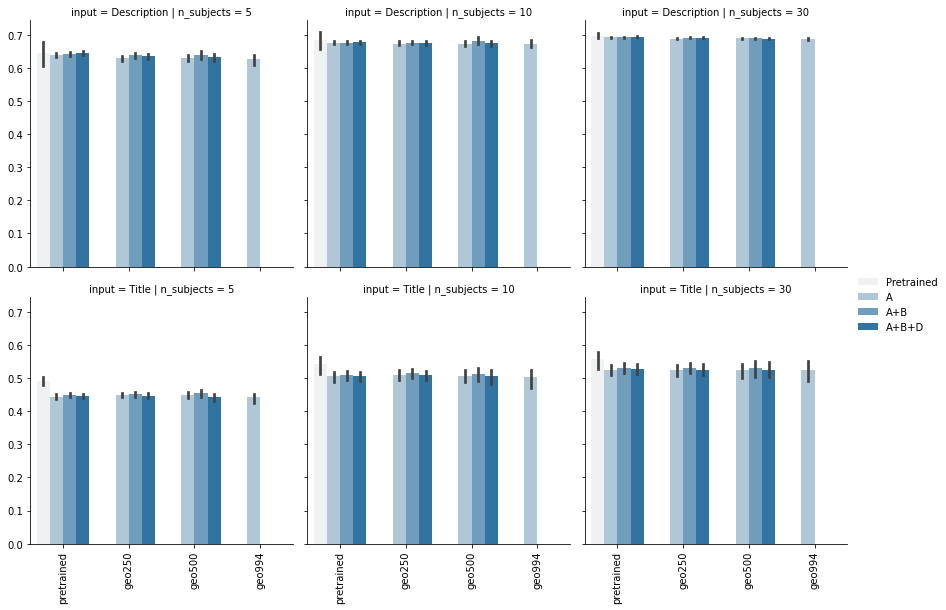

eval_micro-precision


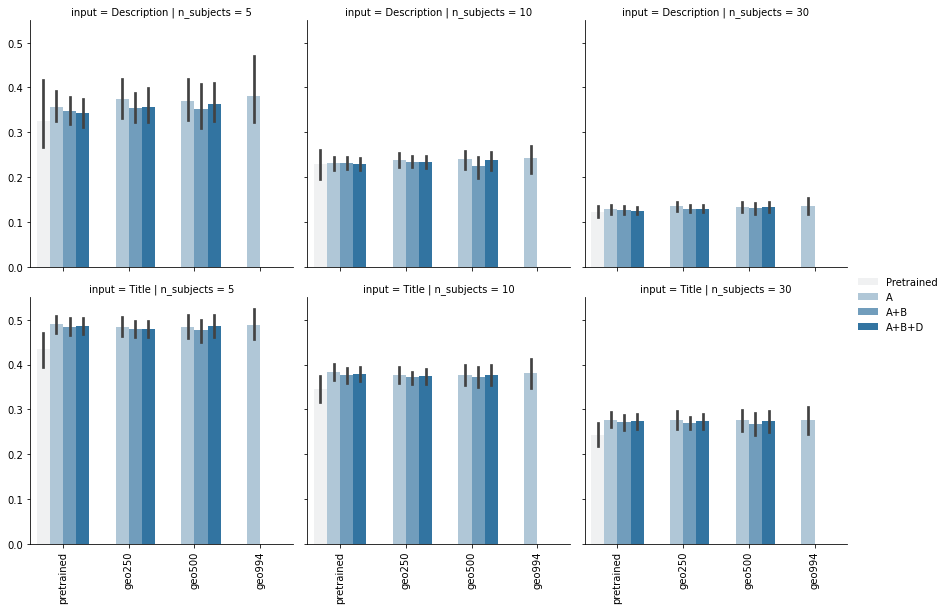

eval_micro-recall


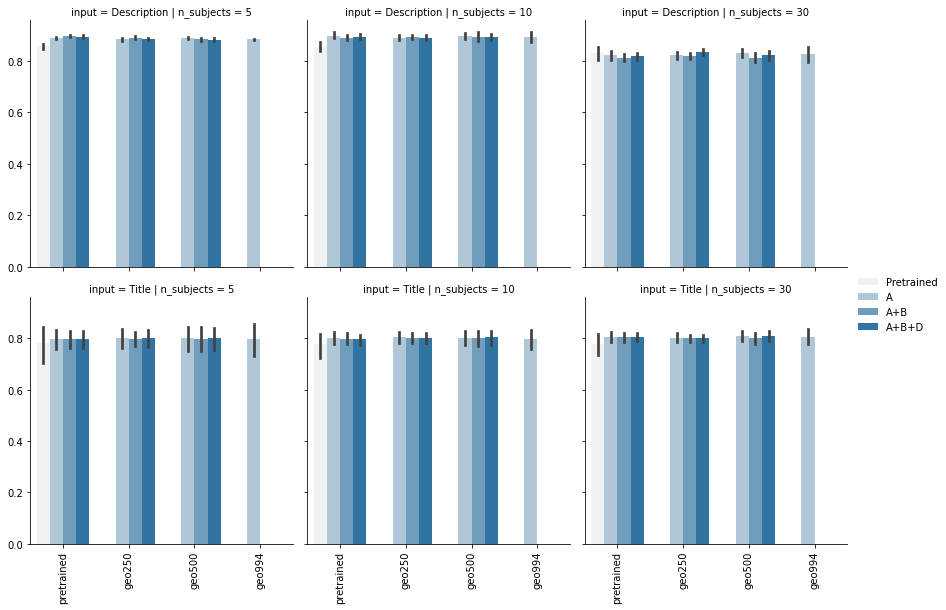

eval_micro-fb1


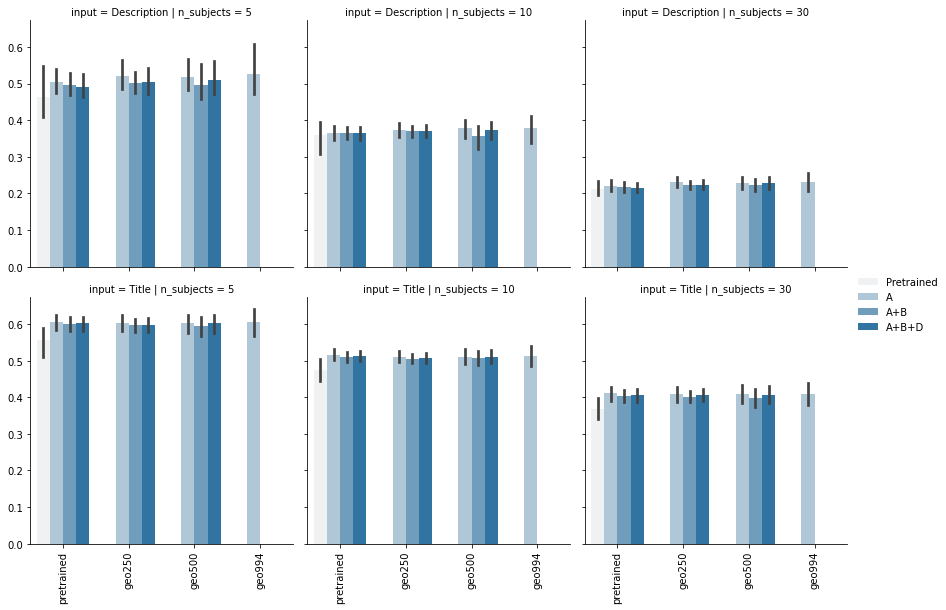

eval_macro-precision


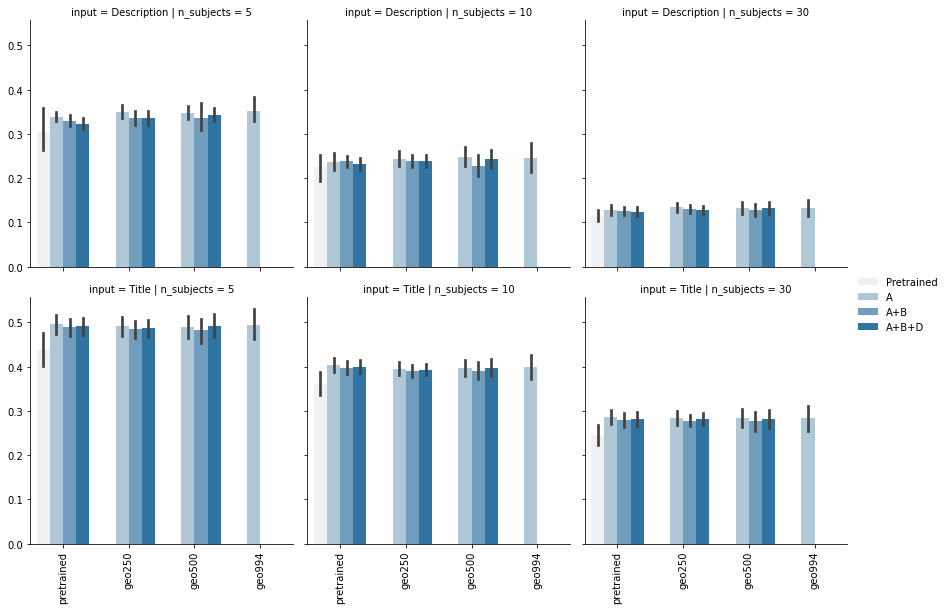

eval_macro-recall


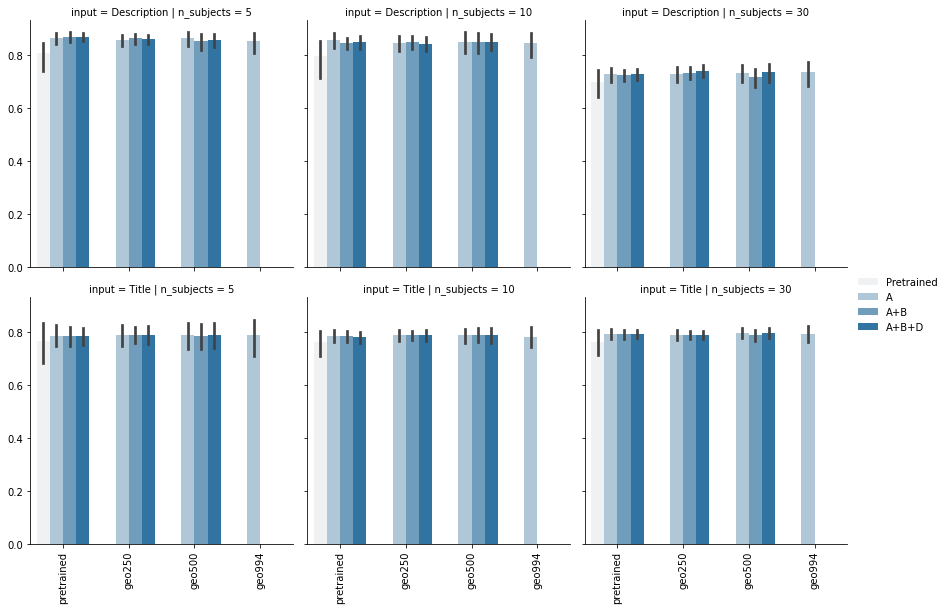

eval_macro-fb1


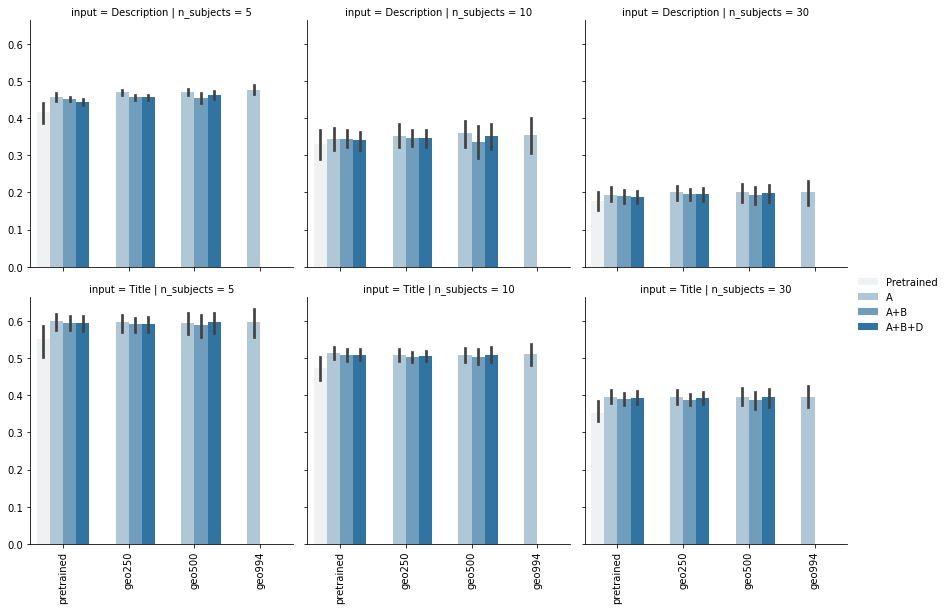

In [230]:
ALL_COLS = ['model_pipeline', 'model_dataset', 'split', 'dataset', 'subject', 
    'text_col', 'meta_pipeline', 'use_class_weights', 'tokenizer', 'training_epochs', 'nrun', 'model_shortform',
           'meta_pipeline_clean']
ALL_COLS_LESS_TOKENIZER = ['model_pipeline', 'model_dataset', 'split', 'dataset', 'subject', 
    'text_col', 'use_class_weights', 'training_epochs', 'nrun', 'model_shortform', 'n_subjects', 
                          'input']

x= bert_eval_data_avg_across_runs.reset_index()
x = x[(x['finished'] == True) &
      #(x['tokenizer'] == 'pretrained') &
      #(x['training_epochs'] == '3m') & 
      (x['meta_pipeline_clean'] == 'None') &
      (x['use_class_weights'] == True) 
      #(x['model_pipeline'] == '90') & 
      #(x['model_dataset'] == 'A+B')
      #(x.model_shortform != 'other') #&
      #(x.text_col == "title_merged")
     ]

display(x)
x = x.groupby(['model_pipeline','tokenizer',
    'model_shortform', 'model_dataset', 'split', 'dataset', 'subject', 
    'text_col', 'use_class_weights', 'training_epochs', 'meta_pipeline_clean',#'tokenizer', 
    'n_subjects', 'input'
]).mean() 
x

display(x.reset_index().tokenizer.value_counts())
display(x.reset_index().text_col.value_counts())
display(x.reset_index().subject.value_counts())
display(x.reset_index().tokenizer.value_counts())
display(x.reset_index().text_col.value_counts())

model_order = ['Pretrained', 'v1_a', 'v1_ab', 'v1_abd', '80_a', '80_ab', '80_abd']
model_pipeline_order = ['Pretrained', 'v1', '80', '90', 'PLUS']
model_dataset_order = ['Pretrained', 'A', 'A+B', 'A+B+D']
meta_pipeline_order = ['None', 'v1', '80'] #x.meta_pipeline_clean.unique()
tokenizer_order = ['pretrained', 'geo250', 'geo500', 'geo994']
x = x.reset_index()
x['meta_pipeline_binary_clean'] = x.meta_pipeline_clean.apply(lambda x: 'v1/80' if x in ['v1', '80'] else 'None')
display(x)
for col in x.filter(regex='eval_[ml]'):
    print(col)
    g = sns.FacetGrid(data=x, col='n_subjects', row='input', col_order=['5','10','30'], height=4, aspect=1)
    g.map_dataframe(sns.barplot, y=col, hue='model_dataset', x='tokenizer', order=tokenizer_order,
        hue_order=model_dataset_order
    )
    g.add_legend()
    
    for ax in g.axes.ravel():
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    plt.show()

## Tokenizers vs Pipelines

,run_dir_full,split,nrun,train/eval,dataset,subject,input,n_subjects,text_col,meta_pipeline,...,eval_micro-recall,eval_micro-fb1,eval_macro-precision,eval_macro-recall,eval_macro-fb1,eval_runtime,eval_samples_per_second,epoch,train_runtime,train_samples_per_second
30,/nrcan_p2/data/07_model_output/keyword_predict...,0,0,eval,small,subject_30,Title,30,title_merged,None_None,...,0.830877,0.355024,0.245649,0.819696,0.344174,4.5079,442.780,3.0,NaN,NaN
31,/nrcan_p2/data/07_model_output/keyword_predict...,0,1,eval,small,subject_30,Title,30,title_merged,None_None,...,0.822343,0.348432,0.244790,0.814398,0.341130,4.4848,445.063,3.0,NaN,NaN
32,/nrcan_p2/data/07_model_output/keyword_predict...,0,2,eval,small,subject_30,Title,30,title_merged,None_None,...,0.835066,0.344812,0.239469,0.830896,0.338662,4.5067,442.901,3.0,NaN,NaN
33,/nrcan_p2/data/07_model_output/keyword_predict...,1,0,eval,small,subject_30,Title,30,title_merged,None_None,...,0.816806,0.326271,0.207208,0.795339,0.313330,4.4895,444.596,3.0,NaN,NaN
34,/nrcan_p2/data/07_model_output/keyword_predict...,1,1,eval,small,subject_30,Title,30,title_merged,None_None,...,0.828472,0.325433,0.206646,0.815447,0.314224,4.4897,444.577,3.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,/nrcan_p2/data/07_model_output/keyword_predict...,3,1,eval,small,subject_desc_t10,Description,10,desc_en_en_50_3000,None_None,...,0.925781,0.389163,0.263965,0.894235,0.392926,0.5104,413.407,3.0,NaN,NaN
4916,/nrcan_p2/data/07_model_output/keyword_predict...,3,2,eval,small,subject_desc_t10,Description,10,desc_en_en_50_3000,None_None,...,0.914062,0.386777,0.264427,0.890235,0.388731,0.4972,424.391,3.0,NaN,NaN
4917,/nrcan_p2/data/07_model_output/keyword_predict...,4,0,eval,small,subject_desc_t10,Description,10,desc_en_en_50_3000,None_None,...,0.876712,0.388467,0.255823,0.859221,0.373875,0.5051,415.725,3.0,NaN,NaN
4918,/nrcan_p2/data/07_model_output/keyword_predict...,4,1,eval,small,subject_desc_t10,Description,10,desc_en_en_50_3000,None_None,...,0.869863,0.381955,0.259855,0.874195,0.375162,0.4994,420.512,3.0,NaN,NaN


pretrained    360
geo250        360
geo500        175
geo994         30
Name: tokenizer, dtype: int64

title_merged          465
desc_en_en_50_3000    460
Name: text_col, dtype: int64

subject_5           310
subject_30          310
subject_desc_t10    305
Name: subject, dtype: int64

pretrained    360
geo250        360
geo500        175
geo994         30
Name: tokenizer, dtype: int64

title_merged          465
desc_en_en_50_3000    460
Name: text_col, dtype: int64

80            265
v1            240
PLUS          210
90            180
Pretrained     30
Name: model_pipeline, dtype: int64

A+B           325
A+B+D         300
A             270
Pretrained     30
Name: model_dataset, dtype: int64

,model_pipeline,tokenizer,model_shortform,model_dataset,split,dataset,subject,text_col,use_class_weights,training_epochs,...,eval_micro-fb1,eval_macro-precision,eval_macro-recall,eval_macro-fb1,eval_runtime,eval_samples_per_second,epoch,train_runtime,train_samples_per_second,meta_pipeline_binary_clean
0,80,geo250,80_a_geo250,A,0,small,subject_30,desc_en_en_50_3000,True,1m,...,0.189622,0.101356,0.602282,0.134532,0.519833,405.926667,3.0,NaN,NaN,None
1,80,geo250,80_a_geo250,A,0,small,subject_30,title_merged,True,1m,...,0.381008,0.271423,0.827018,0.371569,4.502233,443.337000,3.0,NaN,NaN,None
2,80,geo250,80_a_geo250,A,0,small,subject_5,desc_en_en_50_3000,True,1m,...,0.664121,0.381624,0.754281,0.441910,0.504300,418.656333,3.0,NaN,NaN,None
3,80,geo250,80_a_geo250,A,0,small,subject_5,title_merged,True,1m,...,0.638663,0.536311,0.878994,0.643552,4.386567,455.027000,3.0,NaN,NaN,None
4,80,geo250,80_a_geo250,A,0,small,subject_desc_t10,desc_en_en_50_3000,True,1m,...,0.376046,0.197538,0.730068,0.256453,0.511533,412.521000,3.0,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
920,v1,pretrained,v1_abd,A+B+D,4,small,subject_30,title_merged,True,1m,...,0.420893,0.291260,0.745722,0.405167,4.469733,446.562000,3.0,NaN,NaN,None
921,v1,pretrained,v1_abd,A+B+D,4,small,subject_5,desc_en_en_50_3000,True,1m,...,0.475244,0.308309,0.869197,0.434863,0.500733,419.526333,3.0,NaN,NaN,None
922,v1,pretrained,v1_abd,A+B+D,4,small,subject_5,title_merged,True,1m,...,0.529458,0.436312,0.646198,0.514995,4.425533,451.020333,3.0,NaN,NaN,None
923,v1,pretrained,v1_abd,A+B+D,4,small,subject_desc_t10,desc_en_en_50_3000,True,1m,...,0.367828,0.240596,0.858747,0.356336,0.123767,1698.038333,3.0,NaN,NaN,None


eval_loss


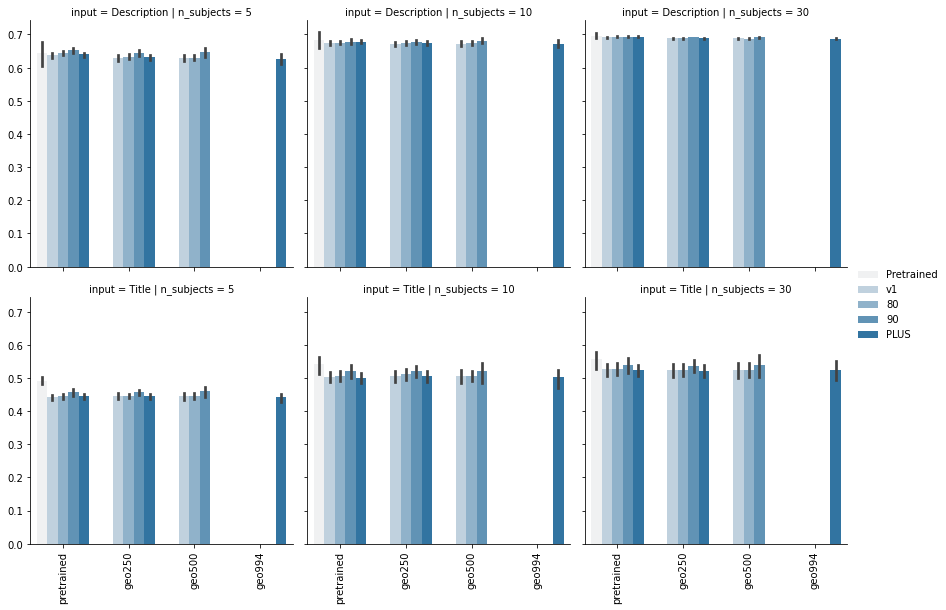

eval_micro-precision


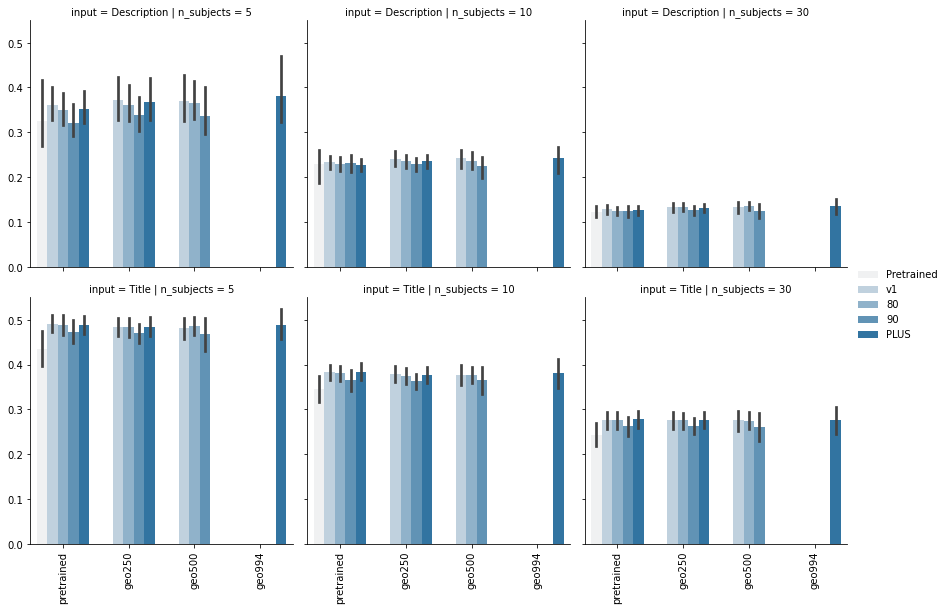

eval_micro-recall


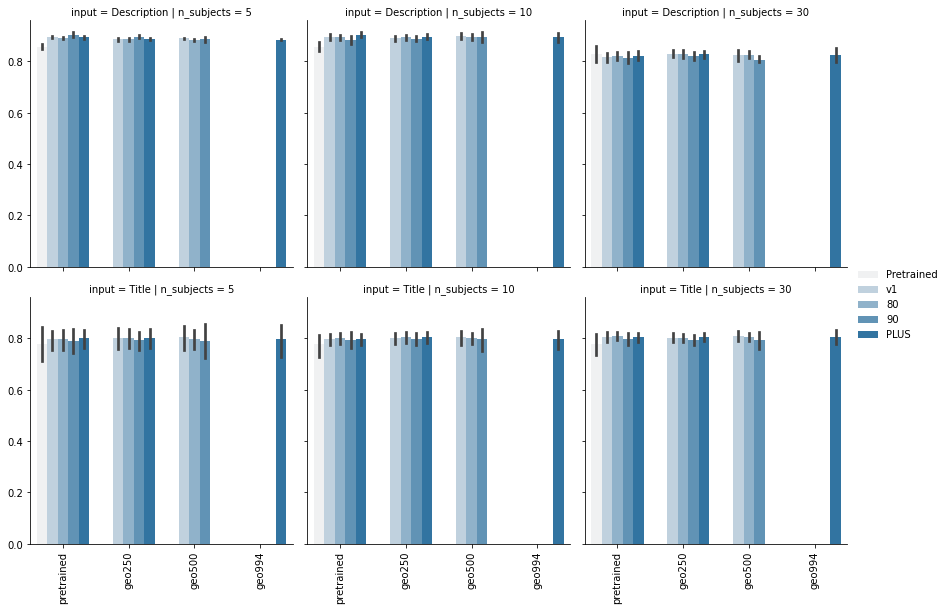

eval_micro-fb1


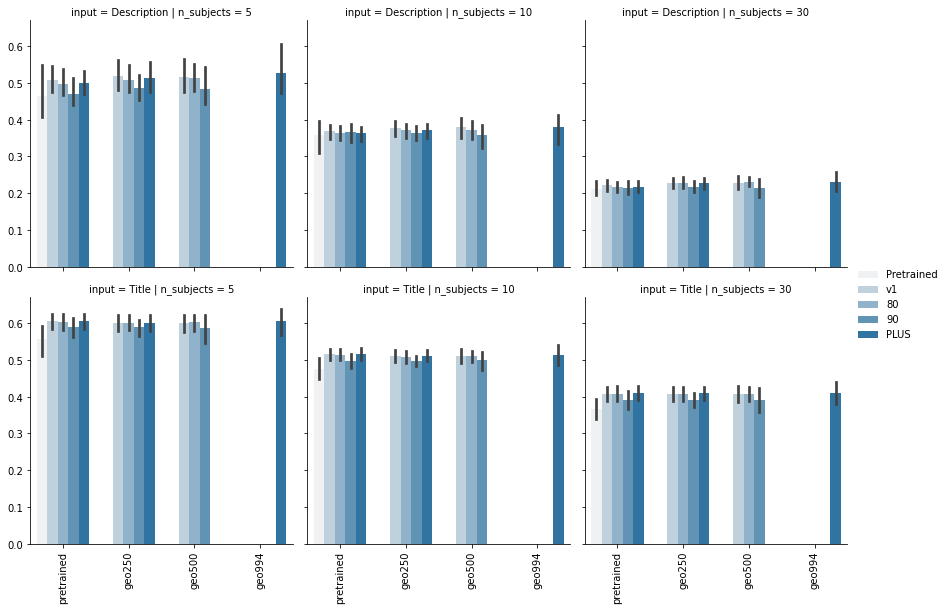

eval_macro-precision


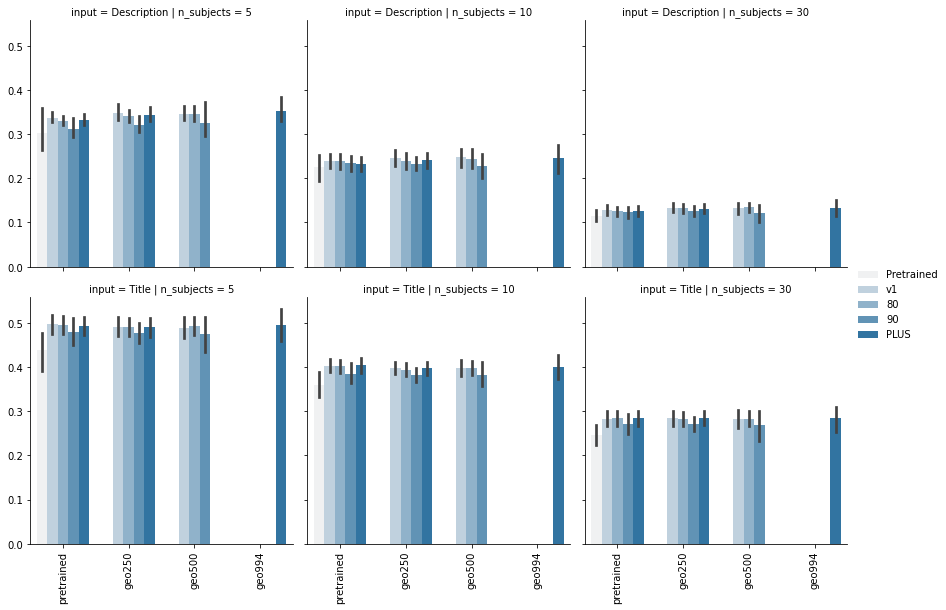

eval_macro-recall


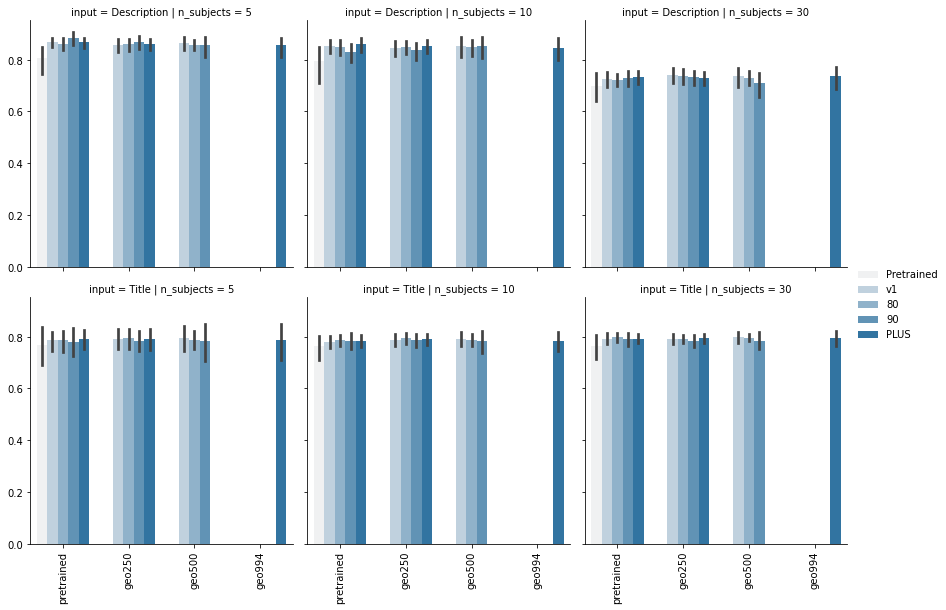

eval_macro-fb1


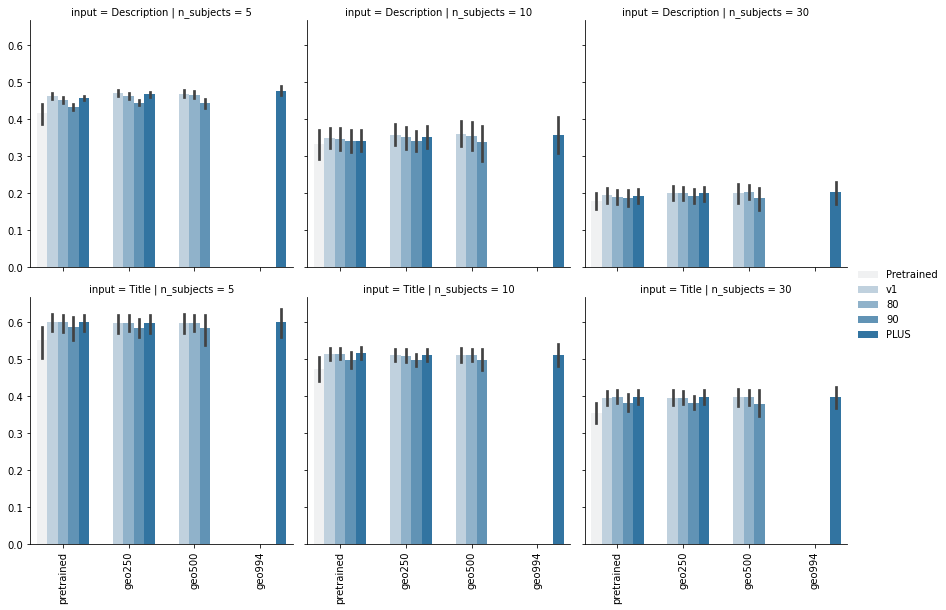

In [232]:
ALL_COLS = ['model_pipeline', 'model_dataset', 'split', 'dataset', 'subject', 
    'text_col', 'meta_pipeline', 'use_class_weights', 'tokenizer', 'training_epochs', 'nrun', 'model_shortform',
           'meta_pipeline_clean']
ALL_COLS_LESS_TOKENIZER = ['model_pipeline', 'model_dataset', 'split', 'dataset', 'subject', 
    'text_col', 'use_class_weights', 'training_epochs', 'nrun', 'model_shortform', 'n_subjects', 
                          'input']

#display(x.iloc[:,14:])
x= bert_eval_data_avg_across_runs.reset_index()
x = x[(x['finished'] == True) &
      #(x['tokenizer'] == 'pretrained') &
      #(x['training_epochs'] == '3m') & 
      (x['meta_pipeline_clean'] == 'None') &
      (x['use_class_weights'] == True) 
      #(x['model_pipeline'] == '90') & 
      #(x['model_dataset'] == 'A+B')
      #(x.model_shortform != 'other') #&
      #(x.text_col == "title_merged")
     ]

display(x)
x = x.groupby(['model_pipeline','tokenizer',
    'model_shortform', 'model_dataset', 'split', 'dataset', 'subject', 
    'text_col', 'use_class_weights', 'training_epochs', 'meta_pipeline_clean',#'tokenizer', 
    'n_subjects', 'input'
]).mean() 
display(x.reset_index().tokenizer.value_counts())
display(x.reset_index().text_col.value_counts())
display(x.reset_index().subject.value_counts())
display(x.reset_index().tokenizer.value_counts())
display(x.reset_index().text_col.value_counts())
display(x.reset_index().model_pipeline.value_counts())
display(x.reset_index().model_dataset.value_counts())


model_order = ['Pretrained', 'v1_a', 'v1_ab', 'v1_abd', '80_a', '80_ab', '80_abd']
model_pipeline_order = ['Pretrained', 'v1', '80', '90', 'PLUS']
model_dataset_order = ['Pretrained', 'A', 'A+B', 'A+B+D']
meta_pipeline_order = ['None', 'v1', '80'] 
tokenizer_order = ['pretrained', 'geo250', 'geo500', 'geo994']
x = x.reset_index()
x['meta_pipeline_binary_clean'] = x.meta_pipeline_clean.apply(lambda x: 'v1/80' if x in ['v1', '80'] else 'None')
display(x)
for col in x.filter(regex='eval_[ml]'):
    print(col)
    g = sns.FacetGrid(data=x, col='n_subjects', row='input', col_order=['5','10','30'], height=4, aspect=1)
    g.map_dataframe(sns.barplot, y=col, hue='model_pipeline', x='tokenizer', order=tokenizer_order,
        hue_order=model_pipeline_order
    )
    g.add_legend()
    
    for ax in g.axes.ravel():
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    plt.show()

## Training time (1m vs 3m steps)?


,run_dir_full,split,nrun,train/eval,dataset,subject,input,n_subjects,text_col,meta_pipeline,...,eval_micro-recall,eval_micro-fb1,eval_macro-precision,eval_macro-recall,eval_macro-fb1,eval_runtime,eval_samples_per_second,epoch,train_runtime,train_samples_per_second
2430,/nrcan_p2/data/07_model_output/keyword_predict...,0,0,eval,small,subject_30,Title,30,title_merged,None_None,...,0.846548,0.364633,0.256809,0.842075,0.360468,4.4811,445.431,3.0,NaN,NaN
2431,/nrcan_p2/data/07_model_output/keyword_predict...,0,1,eval,small,subject_30,Title,30,title_merged,None_None,...,0.843445,0.360131,0.250916,0.836206,0.353428,4.4978,443.773,3.0,NaN,NaN
2432,/nrcan_p2/data/07_model_output/keyword_predict...,0,2,eval,small,subject_30,Title,30,title_merged,None_None,...,0.835531,0.370090,0.265972,0.832590,0.367388,4.4725,446.280,3.0,NaN,NaN
2433,/nrcan_p2/data/07_model_output/keyword_predict...,1,0,eval,small,subject_30,Title,30,title_merged,None_None,...,0.848159,0.331021,0.210820,0.832671,0.319929,4.4660,446.935,3.0,NaN,NaN
2434,/nrcan_p2/data/07_model_output/keyword_predict...,1,1,eval,small,subject_30,Title,30,title_merged,None_None,...,0.848706,0.326485,0.206471,0.834548,0.315281,4.5095,442.624,3.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4825,/nrcan_p2/data/07_model_output/keyword_predict...,3,1,eval,small,subject_desc_t10,Description,10,desc_en_en_50_3000,None_None,...,0.929688,0.365591,0.238674,0.912615,0.366064,0.5075,415.763,3.0,NaN,NaN
4826,/nrcan_p2/data/07_model_output/keyword_predict...,3,2,eval,small,subject_desc_t10,Description,10,desc_en_en_50_3000,None_None,...,0.949219,0.394161,0.252117,0.915861,0.387165,0.5093,414.283,3.0,NaN,NaN
4827,/nrcan_p2/data/07_model_output/keyword_predict...,4,0,eval,small,subject_desc_t10,Description,10,desc_en_en_50_3000,None_None,...,0.907534,0.367036,0.243271,0.884981,0.360081,0.5078,413.565,3.0,NaN,NaN
4828,/nrcan_p2/data/07_model_output/keyword_predict...,4,1,eval,small,subject_desc_t10,Description,10,desc_en_en_50_3000,None_None,...,0.880137,0.354483,0.239278,0.885479,0.354959,0.5101,411.659,3.0,NaN,NaN


geo250        60
pretrained    30
geo500        30
Name: tokenizer, dtype: int64

title_merged          60
desc_en_en_50_3000    60
Name: text_col, dtype: int64

subject_desc_t10    40
subject_5           40
subject_30          40
Name: subject, dtype: int64

geo250        60
pretrained    30
geo500        30
Name: tokenizer, dtype: int64

title_merged          60
desc_en_en_50_3000    60
Name: text_col, dtype: int64

90    120
Name: model_pipeline, dtype: int64

A+B    120
Name: model_dataset, dtype: int64

,model_pipeline,tokenizer,model_shortform,model_dataset,split,dataset,subject,text_col,use_class_weights,training_epochs,...,eval_micro-fb1,eval_macro-precision,eval_macro-recall,eval_macro-fb1,eval_runtime,eval_samples_per_second,epoch,train_runtime,train_samples_per_second,meta_pipeline_binary_clean
0,90,geo250,90_ab_geo250,A+B,0,small,subject_30,desc_en_en_50_3000,True,1m,...,0.174125,0.093956,0.622561,0.129646,0.511700,412.400833,3.0,NaN,NaN,None
1,90,geo250,90_ab_geo250,A+B,0,small,subject_30,desc_en_en_50_3000,True,3m,...,0.173916,0.101087,0.608016,0.132912,0.521100,404.971667,3.0,NaN,NaN,None
2,90,geo250,90_ab_geo250,A+B,0,small,subject_30,title_merged,True,1m,...,0.368853,0.263687,0.829092,0.364314,2.775350,1161.014333,3.0,NaN,NaN,None
3,90,geo250,90_ab_geo250,A+B,0,small,subject_30,title_merged,True,3m,...,0.362445,0.257512,0.824816,0.358805,4.478400,445.707333,3.0,NaN,NaN,None
4,90,geo250,90_ab_geo250,A+B,0,small,subject_5,desc_en_en_50_3000,True,1m,...,0.620996,0.403221,0.758185,0.455151,0.308217,1023.638000,3.0,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,90,pretrained,90_ab,A+B,4,small,subject_30,title_merged,True,1m,...,0.385737,0.260956,0.714953,0.369383,4.481067,445.433667,3.0,NaN,NaN,None
116,90,pretrained,90_ab,A+B,4,small,subject_5,desc_en_en_50_3000,True,1m,...,0.458105,0.300981,0.896440,0.426873,0.503967,416.866667,3.0,NaN,NaN,None
117,90,pretrained,90_ab,A+B,4,small,subject_5,title_merged,True,1m,...,0.510583,0.408911,0.640034,0.493541,4.426800,450.891667,3.0,NaN,NaN,None
118,90,pretrained,90_ab,A+B,4,small,subject_desc_t10,desc_en_en_50_3000,True,1m,...,0.371911,0.249686,0.856589,0.364789,0.138267,1525.153333,3.0,NaN,NaN,None


eval_loss


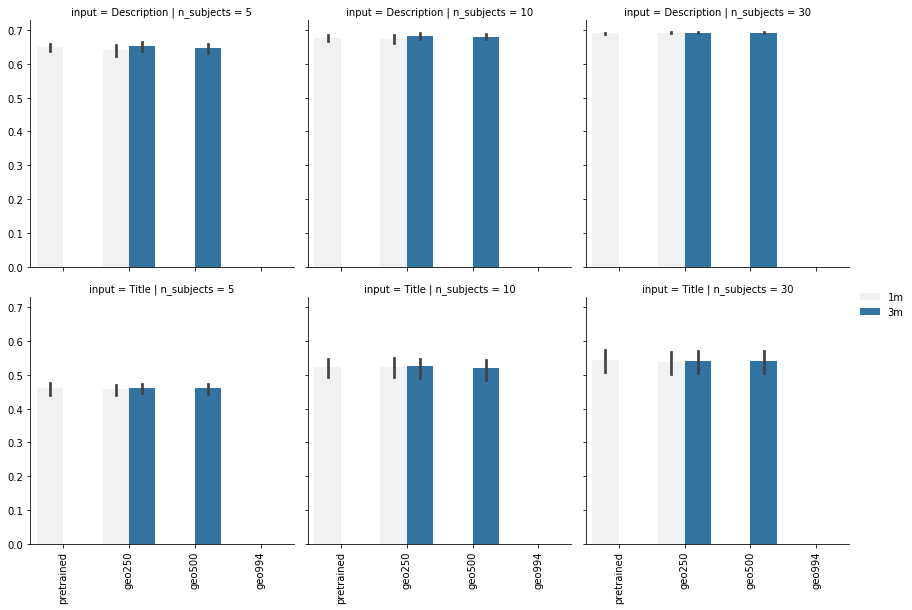

eval_micro-precision


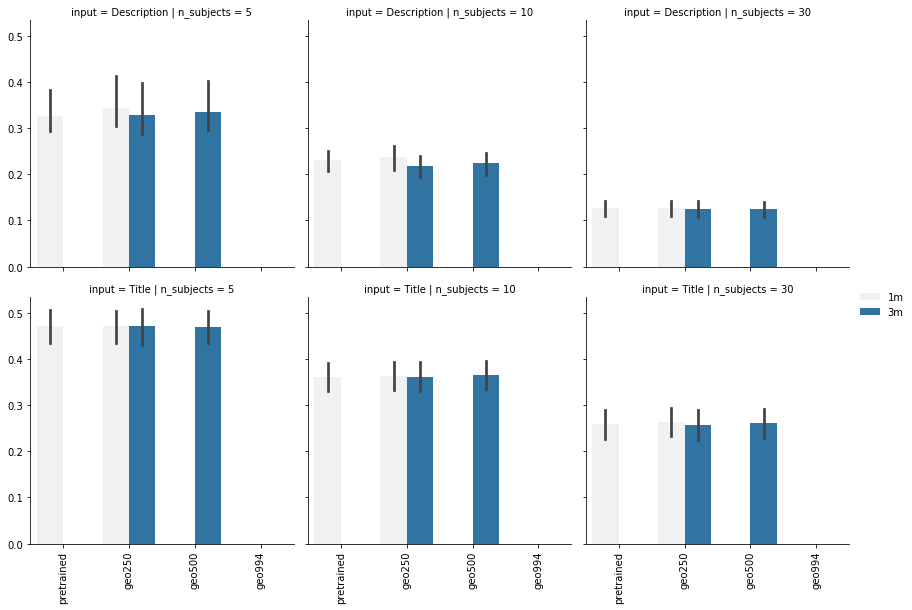

eval_micro-recall


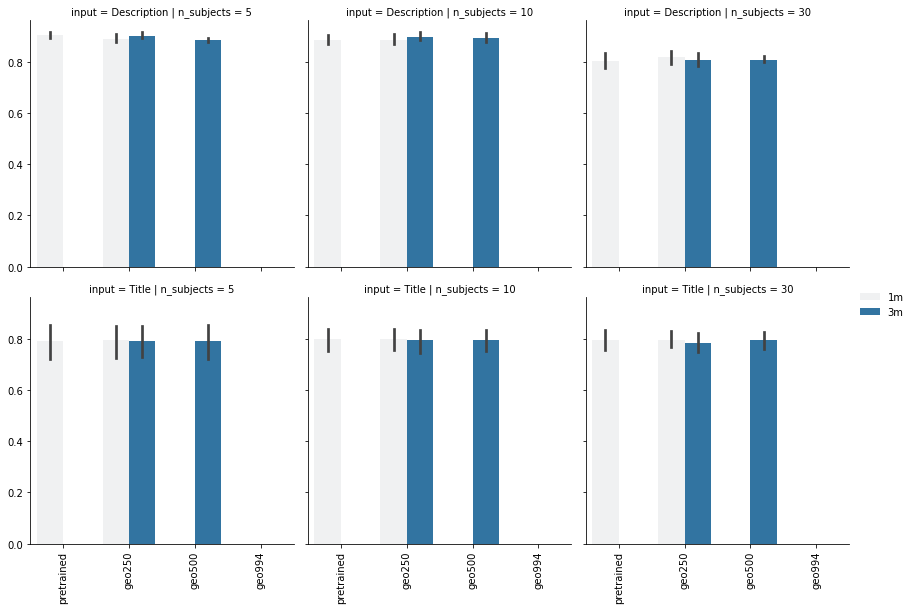

eval_micro-fb1


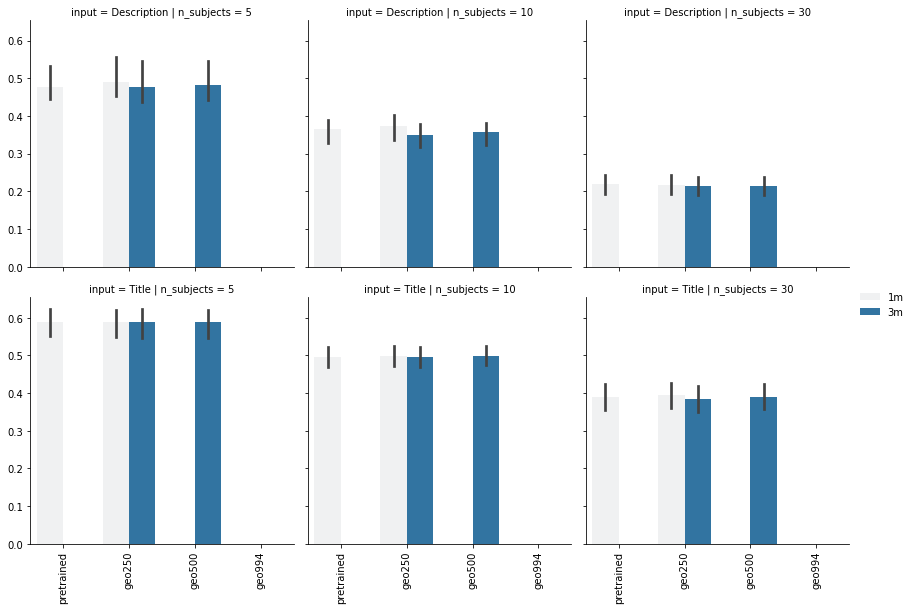

eval_macro-precision


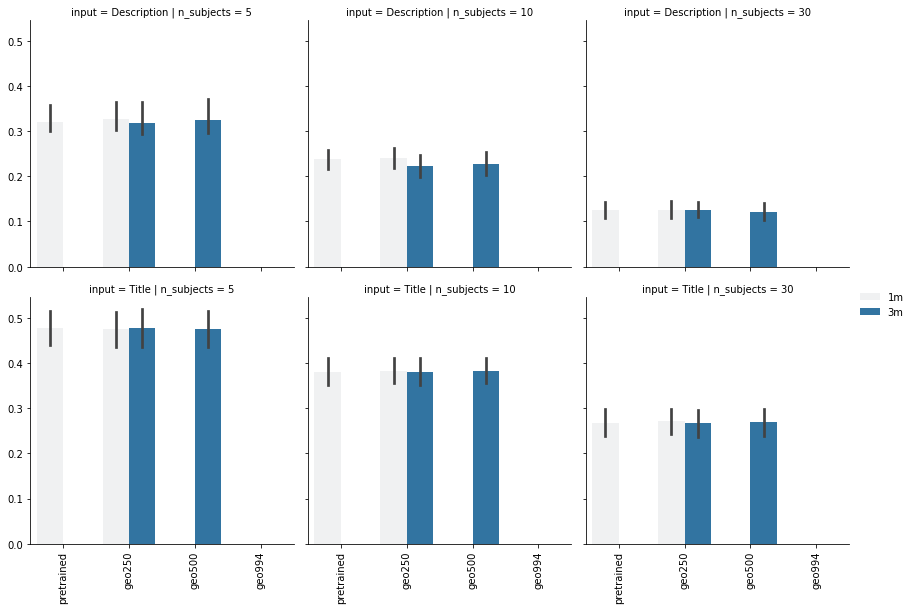

eval_macro-recall


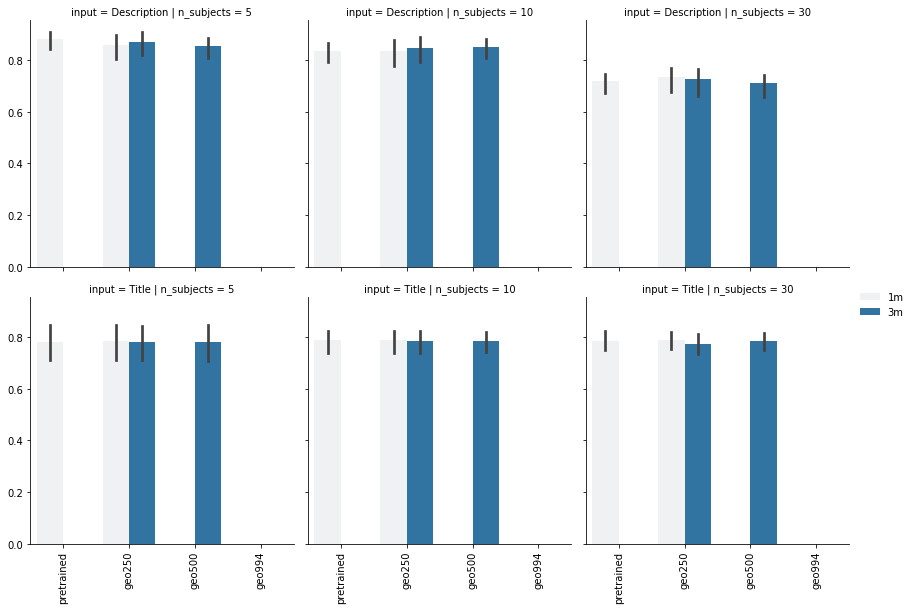

eval_macro-fb1


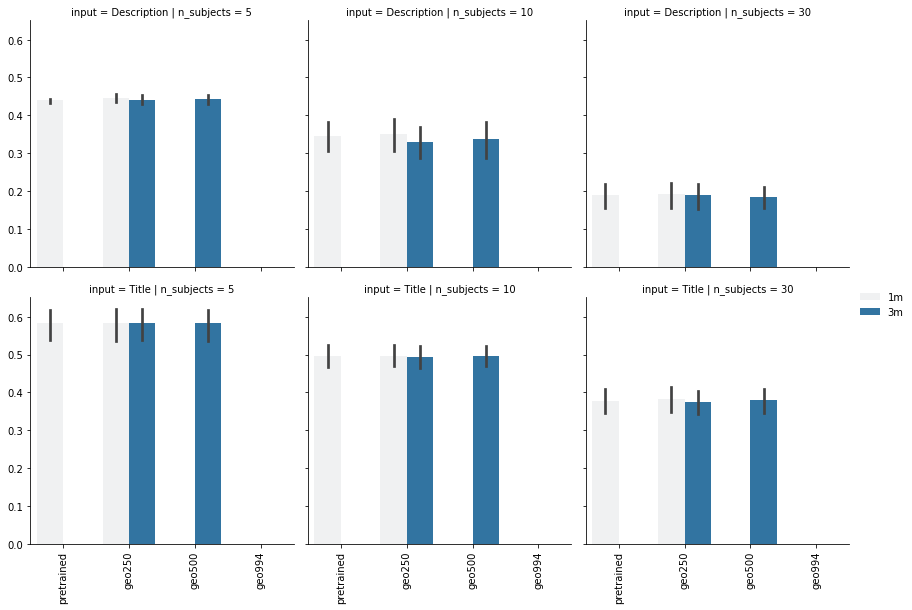

In [235]:
ALL_COLS = ['model_pipeline', 'model_dataset', 'split', 'dataset', 'subject', 
    'text_col', 'meta_pipeline', 'use_class_weights', 'tokenizer', 'training_epochs', 'nrun', 'model_shortform',
           'meta_pipeline_clean']
ALL_COLS_LESS_TOKENIZER = ['model_pipeline', 'model_dataset', 'split', 'dataset', 'subject', 
    'text_col', 'use_class_weights', 'training_epochs', 'nrun', 'model_shortform', 'n_subjects', 
                          'input']

x= bert_eval_data_avg_across_runs.reset_index()
x = x[(x['finished'] == True) &
      #(x['tokenizer'] == 'pretrained') &
      #(x['training_epochs'] == '3m') & 
      (x['meta_pipeline_clean'] == 'None') &
      (x['use_class_weights'] == True) &
      (x['model_pipeline'] == '90') & 
      (x['model_dataset'] == 'A+B')
      #(x.model_shortform != 'other') #&
      #(x.text_col == "title_merged")
     ]

display(x)
x = x.groupby(['model_pipeline','tokenizer',
    'model_shortform', 'model_dataset', 'split', 'dataset', 'subject', 
    'text_col', 'use_class_weights', 'training_epochs', 'meta_pipeline_clean',#'tokenizer', 
    'n_subjects', 'input'
]).mean() 

display(x.reset_index().tokenizer.value_counts())
display(x.reset_index().text_col.value_counts())
display(x.reset_index().subject.value_counts())
display(x.reset_index().tokenizer.value_counts())
display(x.reset_index().text_col.value_counts())
display(x.reset_index().model_pipeline.value_counts())
display(x.reset_index().model_dataset.value_counts())

model_order = ['Pretrained', 'v1_a', 'v1_ab', 'v1_abd', '80_a', '80_ab', '80_abd']
model_pipeline_order = ['Pretrained', 'v1', '80', '90', 'PLUS']
model_dataset_order = ['Pretrained', 'A', 'A+B', 'A+B+D']
meta_pipeline_order = ['None', 'v1', '80'] 
tokenizer_order = ['pretrained', 'geo250', 'geo500', 'geo994']
x = x.reset_index()
x['meta_pipeline_binary_clean'] = x.meta_pipeline_clean.apply(lambda x: 'v1/80' if x in ['v1', '80'] else 'None')
display(x)
for col in x.filter(regex='eval_[ml]'):
    print(col)
    g = sns.FacetGrid(data=x, col='n_subjects', row='input', col_order=['5','10','30'], height=4, aspect=1)
    g.map_dataframe(sns.barplot, y=col, 
        hue='training_epochs', x='tokenizer', 
        order=tokenizer_order,
    )
         
    g.add_legend()
    
    for ax in g.axes.ravel():
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    plt.show()